# Midwest Jet Proposed Expansion Plan

## Importing Libraries

In [221]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read Data

In [222]:
df = pd.read_csv('./Data/AviationData.csv', encoding = 'latin1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Cleaning
1. Cleaning columns to uniform formatting
2. Make Location and Make uniform formatting
3. Converting Event Date to Date Time format, create year and month columns, include only last 20 years
4. Creating Make and Model column
5. Add Total Passengers column
6. Keep US only
7. Keep planes only
8. Keep Investigation Type Accident only
9. Remove Schedule column
10. Remove rows with Nan in Location
11. Remove rows with nan for Location, total fatal injuries, total minor, total uninjured
12. Make Airline names uniform
13. Split City and State from Location
14. Consolidate Injury Severity column into Fatal vs. Non-Fatal
15. Created Favorable and Unfavorable results columns that are 1 when true 

In [223]:
# Standardizing and cleaning the column names 
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('.', ' ')
df.columns = df.columns.str.title()

In [224]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [225]:
# Uniform formatting for Location and Make
df['Location'] = df['Location'].str.title()
df['Make'] = df['Make'].str.title()

In [226]:
# Converting Date to a datetime, add Month and Year lomns
df['Event Date'] = pd.to_datetime(df['Event Date'])
df['Month'] = df['Event Date'].dt.month
df['Year'] = df['Event Date'].dt.year
df = df[df['Year'] >= 2003].copy()

In [227]:
# Adding new column Make & Model
df['Make & Model'] = df['Make'] + " " + df['Model']

In [228]:
# Adding new columns Total Passengers and Total Survivors
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']
df['Total Survivors'] = df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']

In [229]:
# Choose records only for United states
df = df[df['Country'] == 'United States']

In [230]:
# Choose only Airplanes as an Aircraft Category
df = df[df['Aircraft Category'] == 'Airplane']

In [231]:
# Choose only Accident as an Investigation Type
df = df[df['Investigation Type'] == 'Accident']

In [232]:
# Dropping columns from the df
df = df.drop('Schedule', axis=1)
df = df.drop(columns=['Far Description'])
df = df.drop(columns=['Latitude'])
df = df.drop(columns=['Longitude'])

In [233]:
# Cleaning dataset by removin rows
df.dropna(subset = ['Location', 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured'], inplace=True)

In [234]:
# Merge same Air Carrier names together
df['Air Carrier'] = df['Air Carrier'].replace("DELTA AIR LINES INC", "Delta Air Lines")
df['Air Carrier'] = df['Air Carrier'].replace("AMERICAN AIRLINES INC", "American Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("SOUTHWEST AIRLINES CO", "Southwest Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("UNITED AIR LINES INC", "United Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("United Airlines|", "United Airlines")
df['Air Carrier'] = df['Air Carrier'].replace("CIVIL AIR PATROL", "CIVIL AIR PATROL INC")
df['Air Carrier'] = df['Air Carrier'].str.title()

In [235]:
# Split Location into City and State
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df['State'] = df['State'].str.upper()

In [236]:
# Adding new column Count
df['Count'] = 1

In [237]:
# Merge same Injury Severity names together
df['Injury Severity'] = df['Injury Severity'].replace('Fatal(1)', 'Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Fatal(2)', 'Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Fatal(3)', 'Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Fatal(5)', 'Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Minor', 'Non-Fatal')
df['Injury Severity'] = df['Injury Severity'].replace('Serious', 'Non-Fatal')
df['Injury Severity'].value_counts()

Injury Severity
Non-Fatal    14409
Fatal         3077
Name: count, dtype: int64

In [238]:
# Adding new column Favorable Result
condition = (df['Total Uninjured'] > 10) & (df['Injury Severity'] == 'Non-Fatal')
values = np.where(condition, 1, 0)
df['Favorable Result'] = values

In [239]:
# Adding new column Unfavorable Result
condition_2 = (df['Aircraft Damage'] == 'Destroyed') & (df['Injury Severity'] == 'Fatal')
values_2 = np.where(condition_2, 1, 0)
df['Unfavorable Result'] = values_2

In [240]:
# Merge same Make names together
df['Make'] = df['Make'].astype(str)
df.loc[df['Make'].str.contains('Boeing', case=False), 'Make'] = 'Boeing'
df.loc[df['Make'].str.contains('Airbus', case=False), 'Make'] = 'Airbus'
df.loc[df['Make'].str.contains('Bombardier', case=False), 'Make'] = 'Bombardier'
df.loc[df['Make'].str.contains('Grunman', case=False), 'Make'] = 'Grunman'
df.loc[df['Make'].str.contains('Air Tractor', case=False), 'Make'] = 'Air Tractor'
df.loc[df['Make'].str.contains('Cirrus', case=False), 'Make'] = 'Cirrus'
df.loc[df['Make'].str.contains('Mcdonnell Douglas', case=False), 'Make'] = 'Mcdonnell Douglas'
df.loc[df['Make'].str.contains('Embraer', case=False), 'Make'] = 'Embraer'
df.loc[df['Make'].str.contains('Douglas', case=False), 'Make'] = 'McDonnell Douglas'
df.loc[df['Make'].str.contains('De Havilland', case=False), 'Make'] = 'Dehavilland'

In [241]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count,Favorable Result,Unfavorable Result
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal,Destroyed,...,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1,0,1
58138,20050208X00153,Accident,DCA05MA031,2005-02-02,"Teterboro, Nj",United States,KTEB,Teterboro NJ,Non-Fatal,Substantial,...,2,2005,Bombardier CL-600-1A11,13.0,13.0,Teterboro,NJ,1,0,0
59362,20050921X01501,Accident,DCA05MA095,2005-08-19,"Agana, Gu",United States,GUM,Guam-Antonio B. Won Pat,Non-Fatal,Substantial,...,8,2005,Boeing 747-200,340.0,340.0,Agana,GU,1,1,0
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal,Destroyed,...,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1,0,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal,Destroyed,...,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1,0,1


## Data Exploration

### Analysis by State

In [242]:
# Adding new DataFrame df_by_state
df_by_state = df.groupby(by = 'State').sum(numeric_only = True)
df_by_state.drop(['Number Of Engines', 'Month', 'Year'], axis=1, inplace=True)
df_by_state.sort_values(by = 'Count', ascending = False).head()

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result
State,,,,,,,,,
CA,556.0,552.0,309.0,5293.0,6710.0,6154.0,1606,35,138
TX,393.0,388.0,314.0,4474.0,5569.0,5176.0,1386,24,121
FL,406.0,349.0,248.0,5315.0,6318.0,5912.0,1292,29,95
AK,252.0,317.0,186.0,2601.0,3356.0,3104.0,1265,5,36
AZ,183.0,115.0,94.0,1502.0,1894.0,1711.0,650,9,30


In [243]:
# Calculate percentage and rounding the calculated percentage
df_by_state['Percent Fatal Injuries'] = (df_by_state['Total Fatal Injuries'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Serious Injuries'] = (df_by_state['Total Serious Injuries'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Minor Injuries'] = (df_by_state['Total Minor Injuries'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Uninjured'] = (df_by_state['Total Uninjured'] / df_by_state['Total Passengers'])*100
df_by_state['Percent Survivors'] = (df_by_state['Total Survivors'] / df_by_state['Total Passengers'])*100
df_by_state.head()

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
State,,,,,,,,,,,,,,
,26.0,13.0,17.0,633.0,689.0,663.0,39,3,6,3.773585,1.886792,2.467344,91.872279,96.226415
AK,252.0,317.0,186.0,2601.0,3356.0,3104.0,1265,5,36,7.508939,9.445769,5.542312,77.502980,92.491061
AL,91.0,52.0,30.0,221.0,394.0,303.0,224,0,21,23.096447,13.197970,7.614213,56.091371,76.903553
AO,15.0,2.0,2.0,274.0,293.0,278.0,13,1,3,5.119454,0.682594,0.682594,93.515358,94.880546
AR,81.0,69.0,42.0,238.0,430.0,349.0,279,0,23,18.837209,16.046512,9.767442,55.348837,81.162791


In [244]:
df_by_state.sort_values(by='Percent Survivors', ascending=False, inplace=True)

In [245]:
# Filtering out rows where the Count column is not greater than 1
df_by_state = df_by_state[df_by_state['Count'] > 1].copy()
df_by_state.reset_index(inplace=True)
# Removing specific states from the DataFrame
df_by_state = df_by_state[df_by_state['State'].str.strip() != 'PO'].copy()
df_by_state = df_by_state[df_by_state['State'].str.strip() != 'AO'].copy()
df_by_state = df_by_state[df_by_state['State'].str.strip() != 'PR'].copy()
df_by_state = df_by_state[df_by_state['State'].str.strip() != 'OF'].copy()
df_by_state.set_index('State', inplace=True)
df_by_state.reset_index(inplace=True) 
df_by_state.drop(8, inplace=True)
# Setting the State column as the new index
df_by_state.set_index('State', inplace=True)
df_by_state.head()

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
State,,,,,,,,,,,,,,
MD,27.0,52.0,23.0,1027.0,1129.0,1102.0,194,5,5,2.391497,4.605846,2.037201,90.965456,97.608503
VT,5.0,7.0,7.0,165.0,184.0,179.0,40,1,2,2.717391,3.804348,3.804348,89.673913,97.282609
NH,10.0,9.0,17.0,308.0,344.0,334.0,61,1,2,2.906977,2.616279,4.941860,89.534884,97.093023
NJ,53.0,49.0,63.0,1384.0,1549.0,1496.0,216,8,12,3.421562,3.163331,4.067140,89.347966,96.578438
IL,93.0,95.0,58.0,2462.0,2708.0,2615.0,365,21,22,3.434269,3.508124,2.141802,90.915805,96.565731


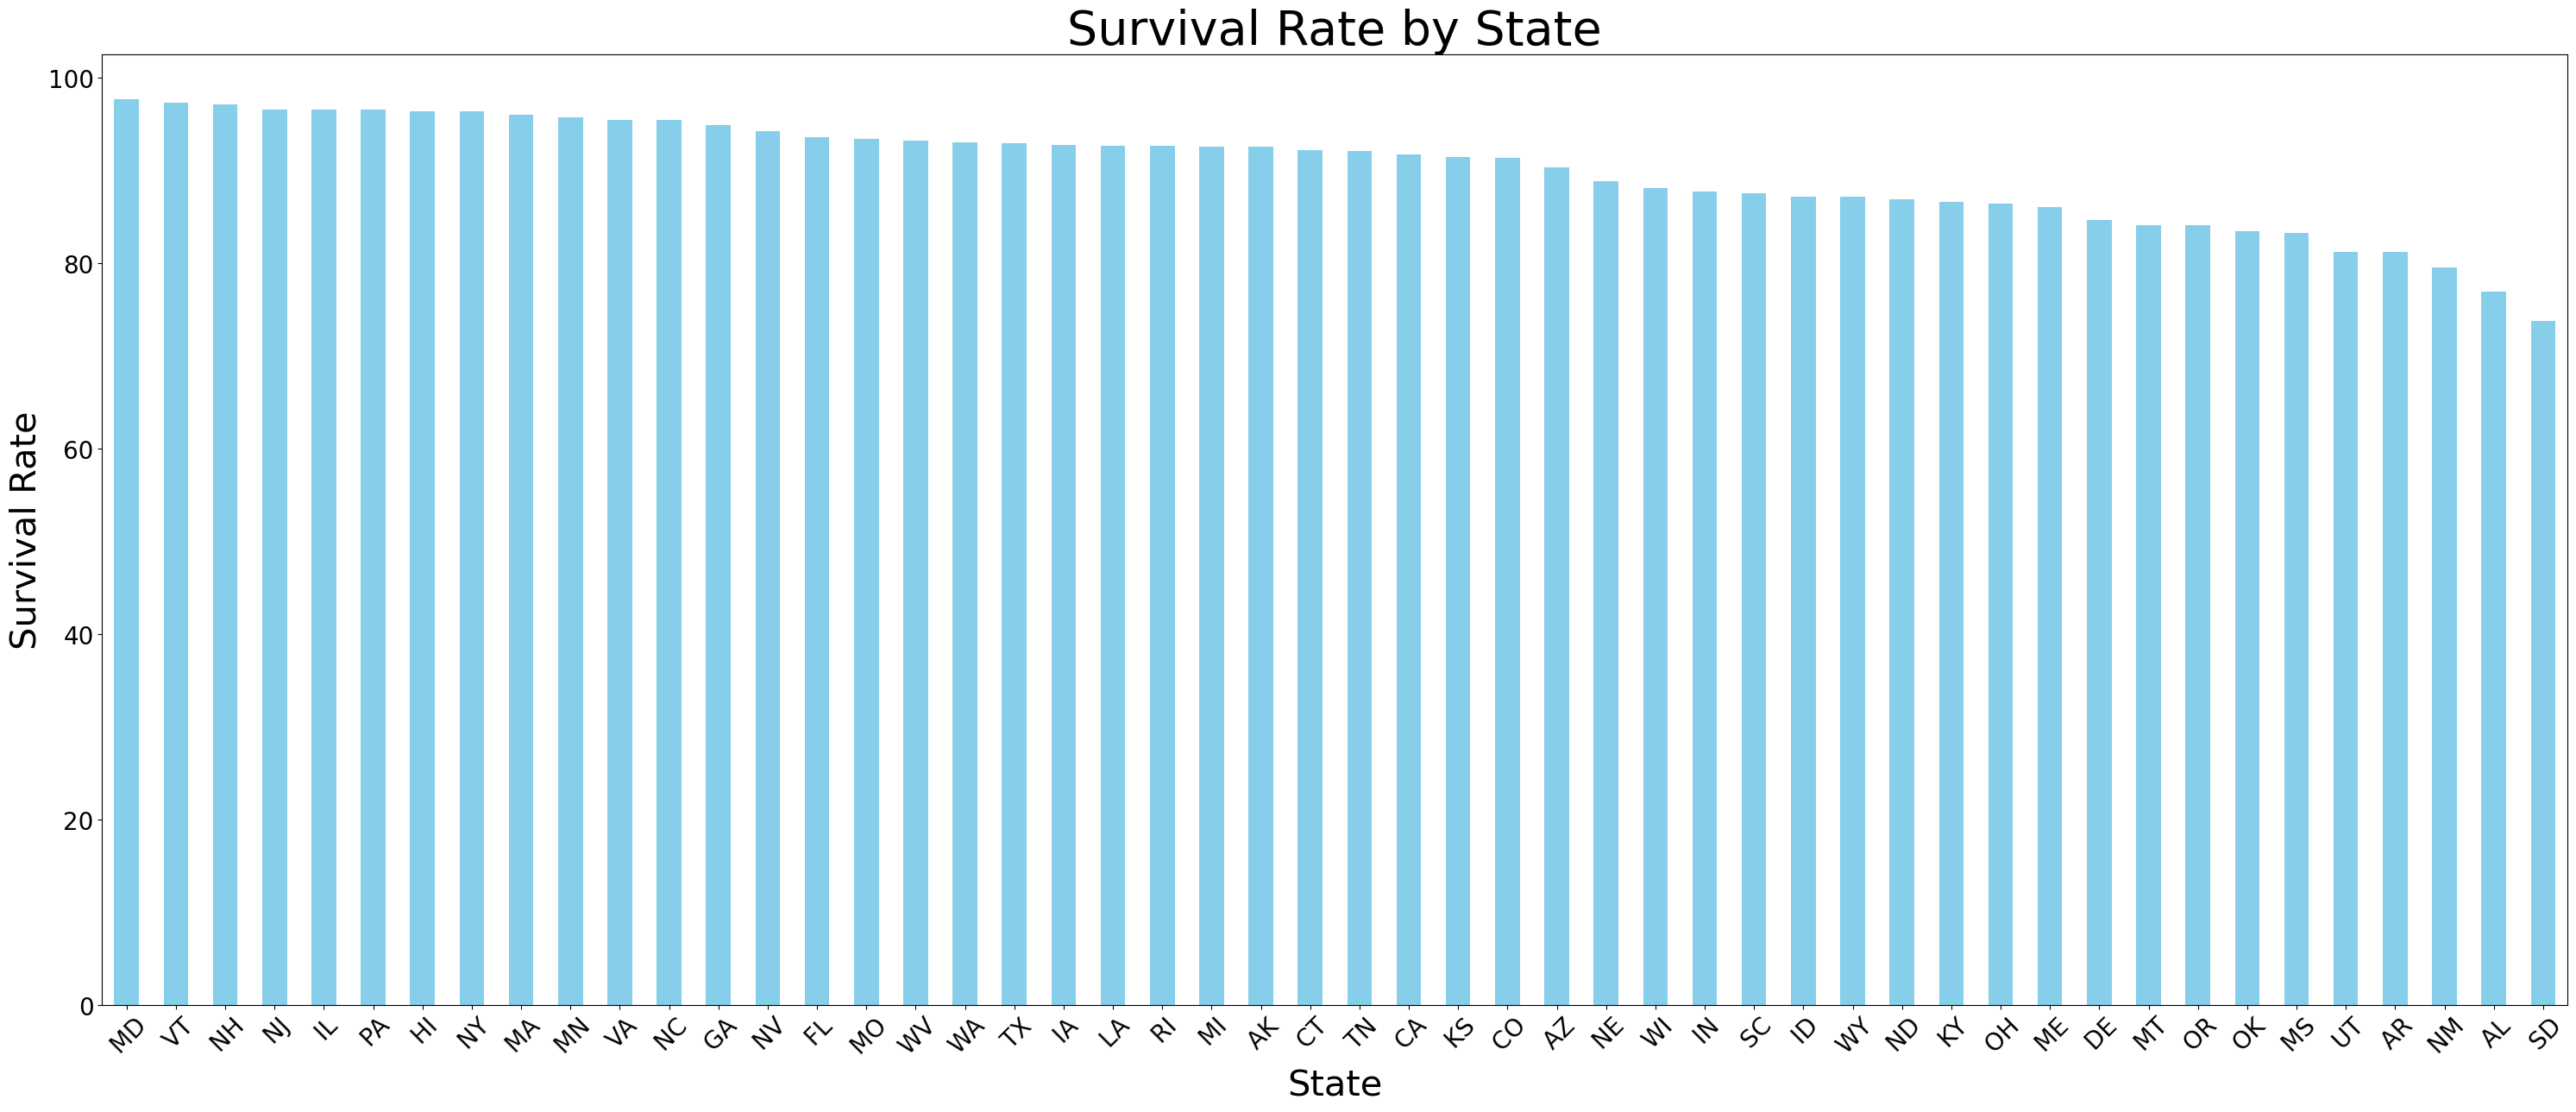

In [246]:
# Create a bar plot to visualize the frequency of the Survival Rate by State
plt.figure(figsize=(30,13))
df_by_state['Percent Survivors'].plot(kind='bar', color='skyblue')
plt.xlabel('State', fontsize=30) 
plt.ylabel('Survival Rate', fontsize=30)
plt.title('Survival Rate by State', fontsize=40)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
plt.show()

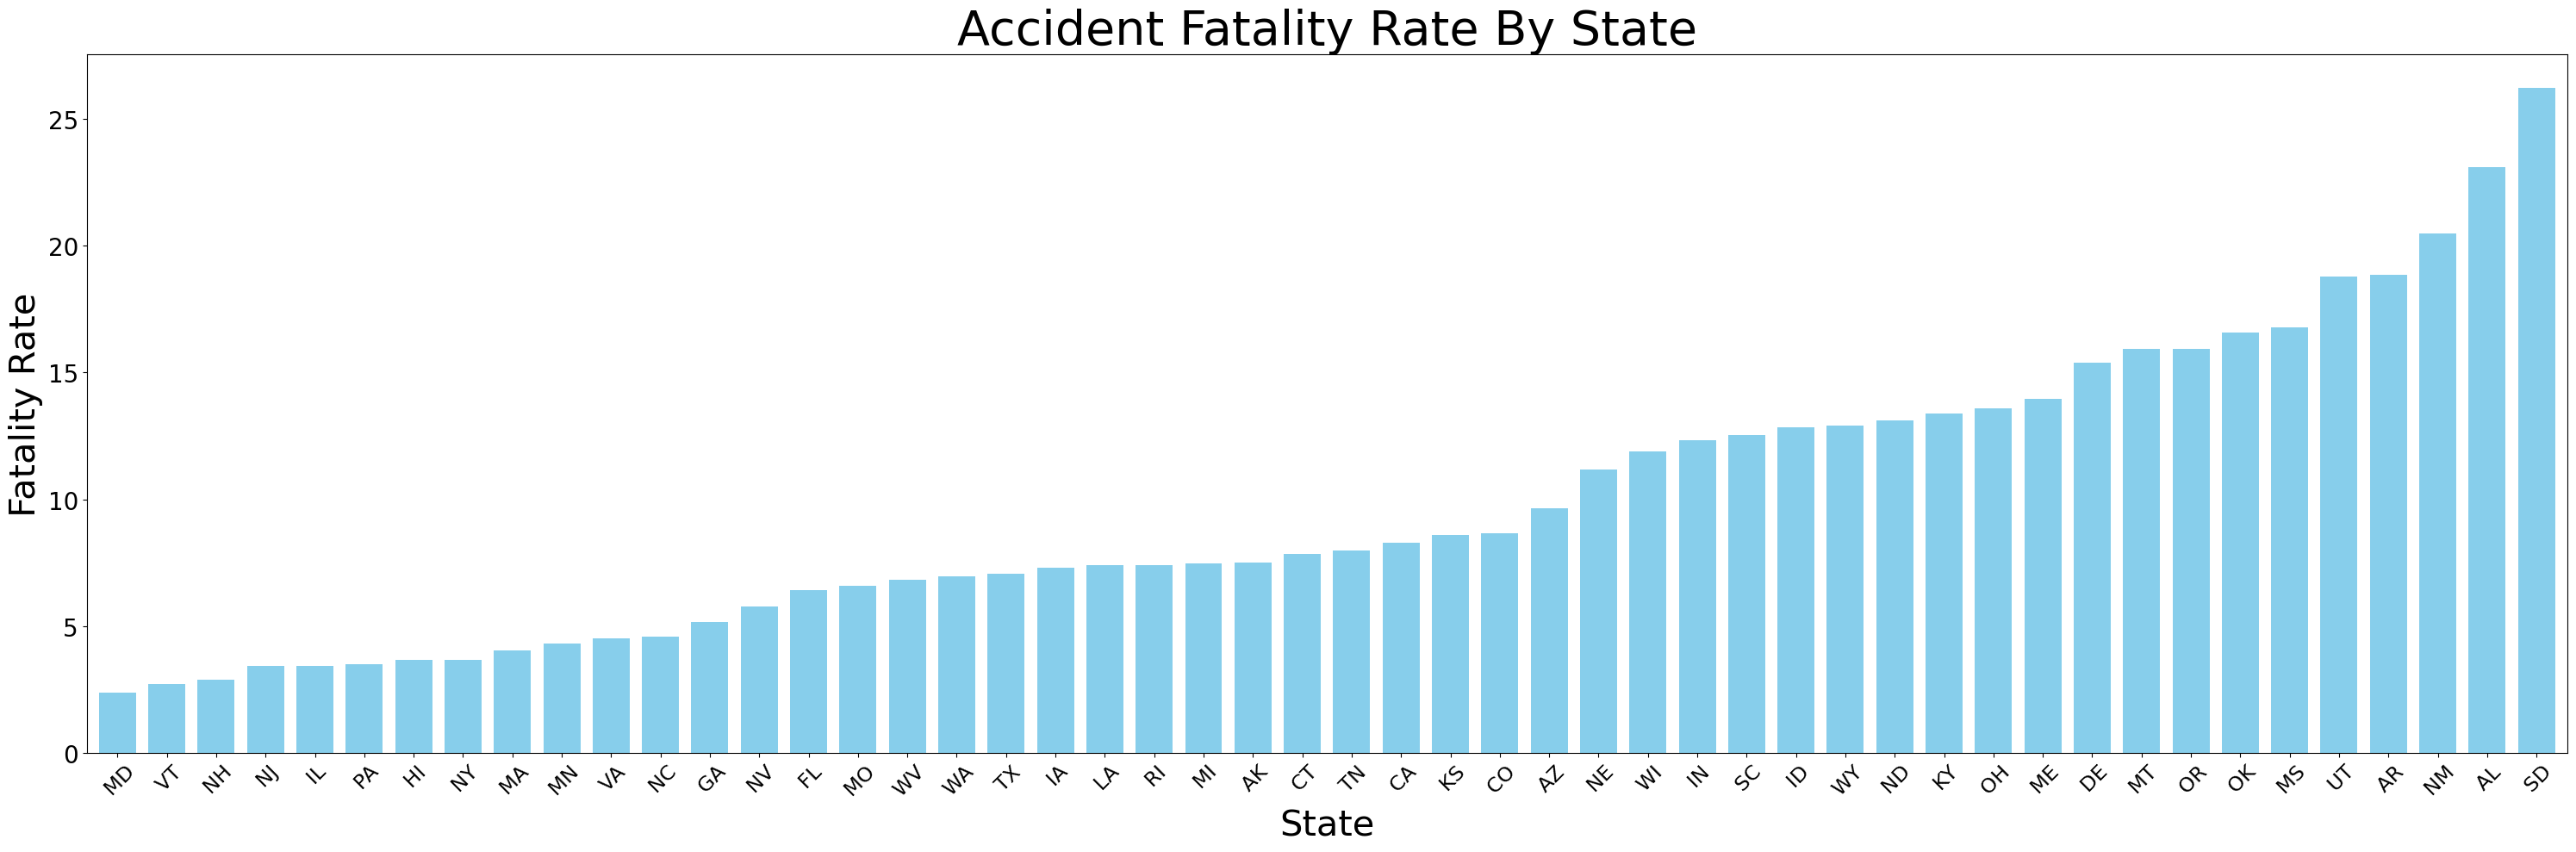

In [247]:
# Create a bar plot to visualize the Accident Fatality Rate by State
plt.figure(figsize=(30,10))
df_by_state['Percent Fatal Injuries'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('State', fontsize=30)
plt.ylabel('Fatality Rate', fontsize=30)
plt.title('Accident Fatality Rate By State', fontsize=40)
plt.xticks(rotation=45, fontsize=17) 
plt.yticks(rotation=0, fontsize=20) 
plt.tight_layout()
plt.show()

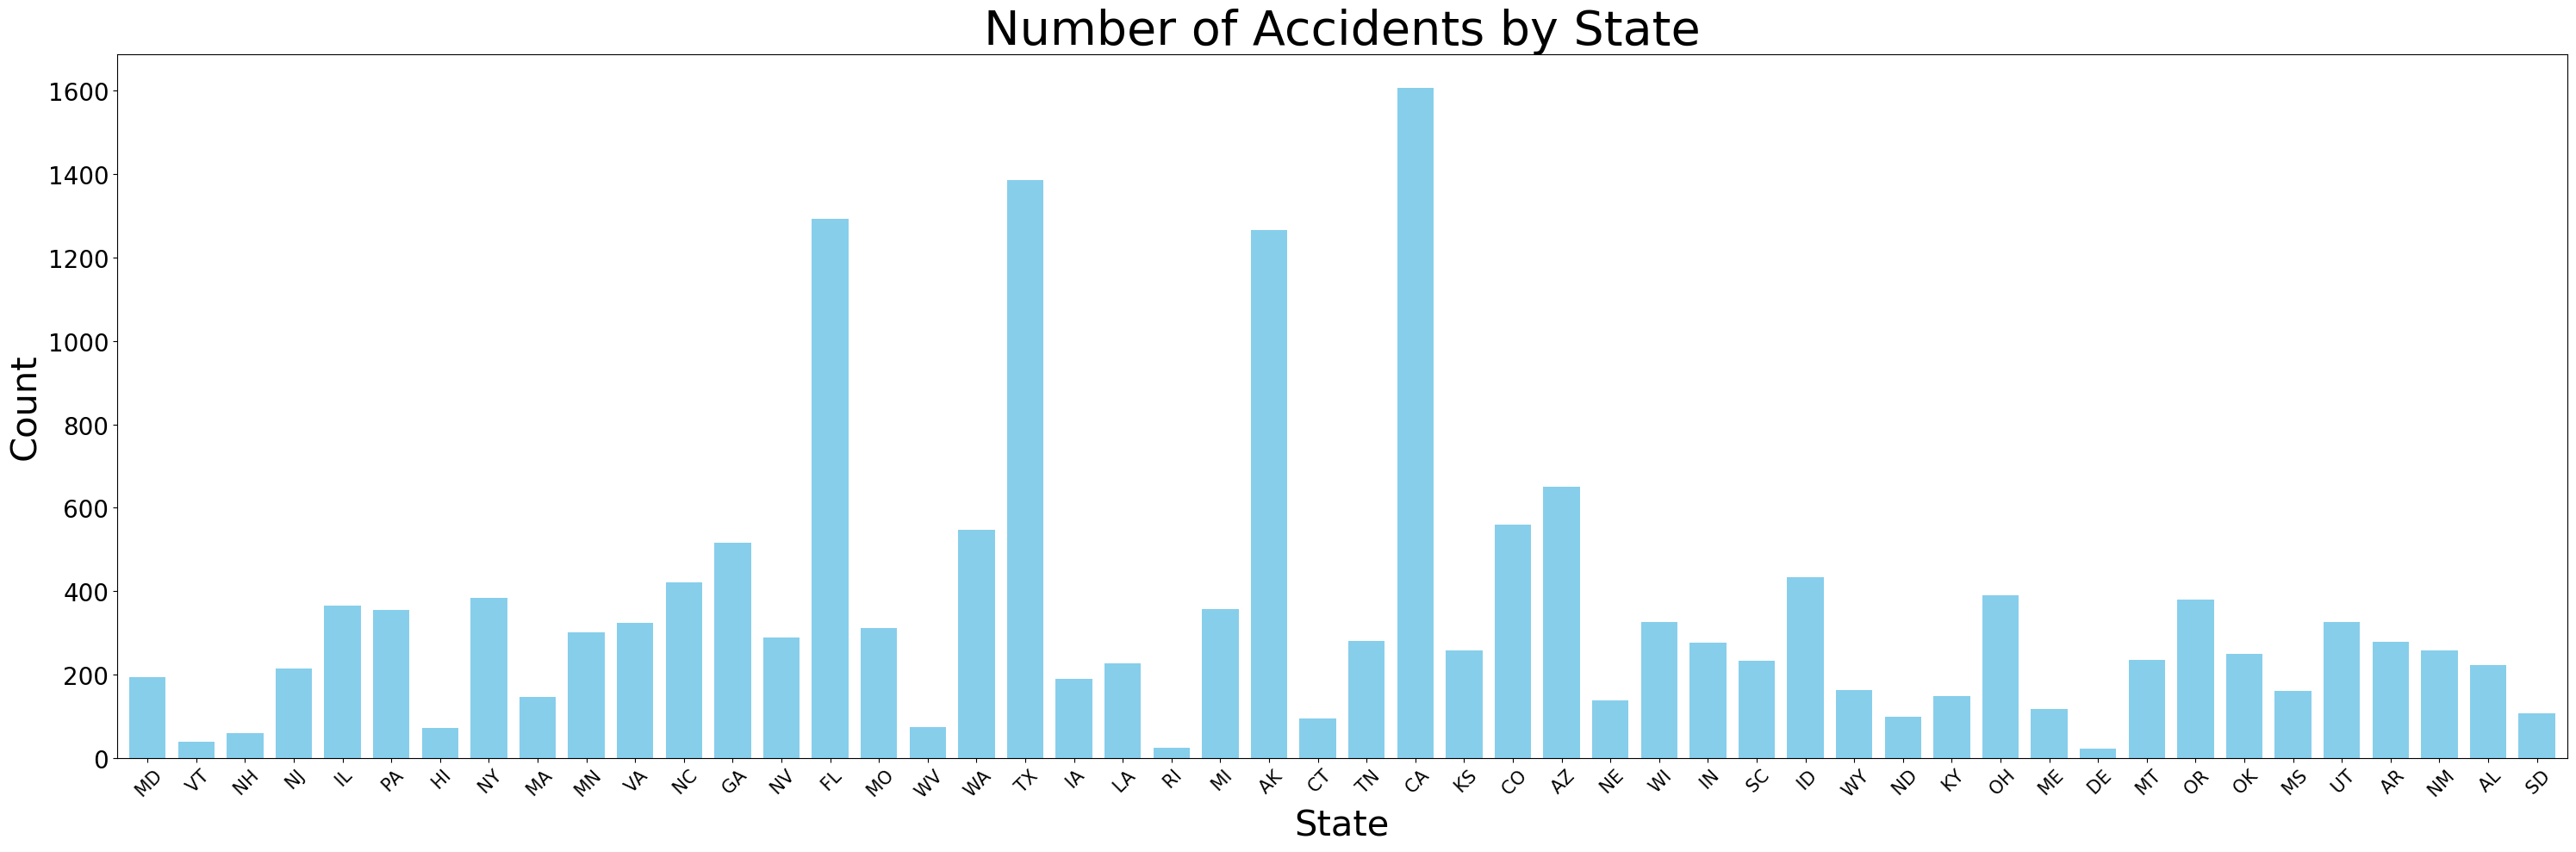

In [248]:
# Create a bar plot to visualize the Number of Accidents by State
plt.figure(figsize=(30,10))
df_by_state['Count'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('State', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.title('Number of Accidents by State', fontsize=40)
plt.xticks(rotation=45, fontsize=15) 
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
plt.show()

### Make & Model Analysis

In [249]:
# Adding new DataFrame df_make
df_make = df.groupby(by='Make').sum(numeric_only=True)
df_make.drop(['Number Of Engines', 'Month', 'Year'], axis=1, inplace=True)
df_make.sort_values(by='Count', inplace=True, ascending=False)


In [250]:
# Adding new columns Percent Favorable and Percent Unfavorable
df_make['Percent Favorable'] = (df_make['Favorable Result'] / df_make['Count'])*100
df_make['Percent Unfavorable'] = (df_make['Unfavorable Result'] / df_make['Count'])*100
df_make.head(20)

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Favorable,Percent Unfavorable
Make,,,,,,,,,,,
Cessna,1260.0,1368.0,668.0,6506.0,9802.0,8542.0,5167,5,292,0.096768,5.651248
Piper,953.0,728.0,495.0,3483.0,5659.0,4706.0,3053,1,227,0.032755,7.435310
Beech,582.0,278.0,207.0,1328.0,2395.0,1813.0,1090,4,140,0.366972,12.844037
Air Tractor,63.0,56.0,35.0,206.0,360.0,297.0,349,0,28,0.000000,8.022923
Cirrus,152.0,87.0,47.0,295.0,581.0,429.0,292,0,40,0.000000,13.698630
Mooney,136.0,71.0,69.0,218.0,494.0,358.0,276,0,26,0.000000,9.420290
Boeing,29.0,522.0,178.0,22698.0,23427.0,23398.0,269,139,7,51.672862,2.602230
Bellanca,37.0,30.0,30.0,162.0,259.0,222.0,174,0,4,0.000000,2.298851
Aeronca,26.0,39.0,25.0,155.0,245.0,219.0,167,0,6,0.000000,3.592814


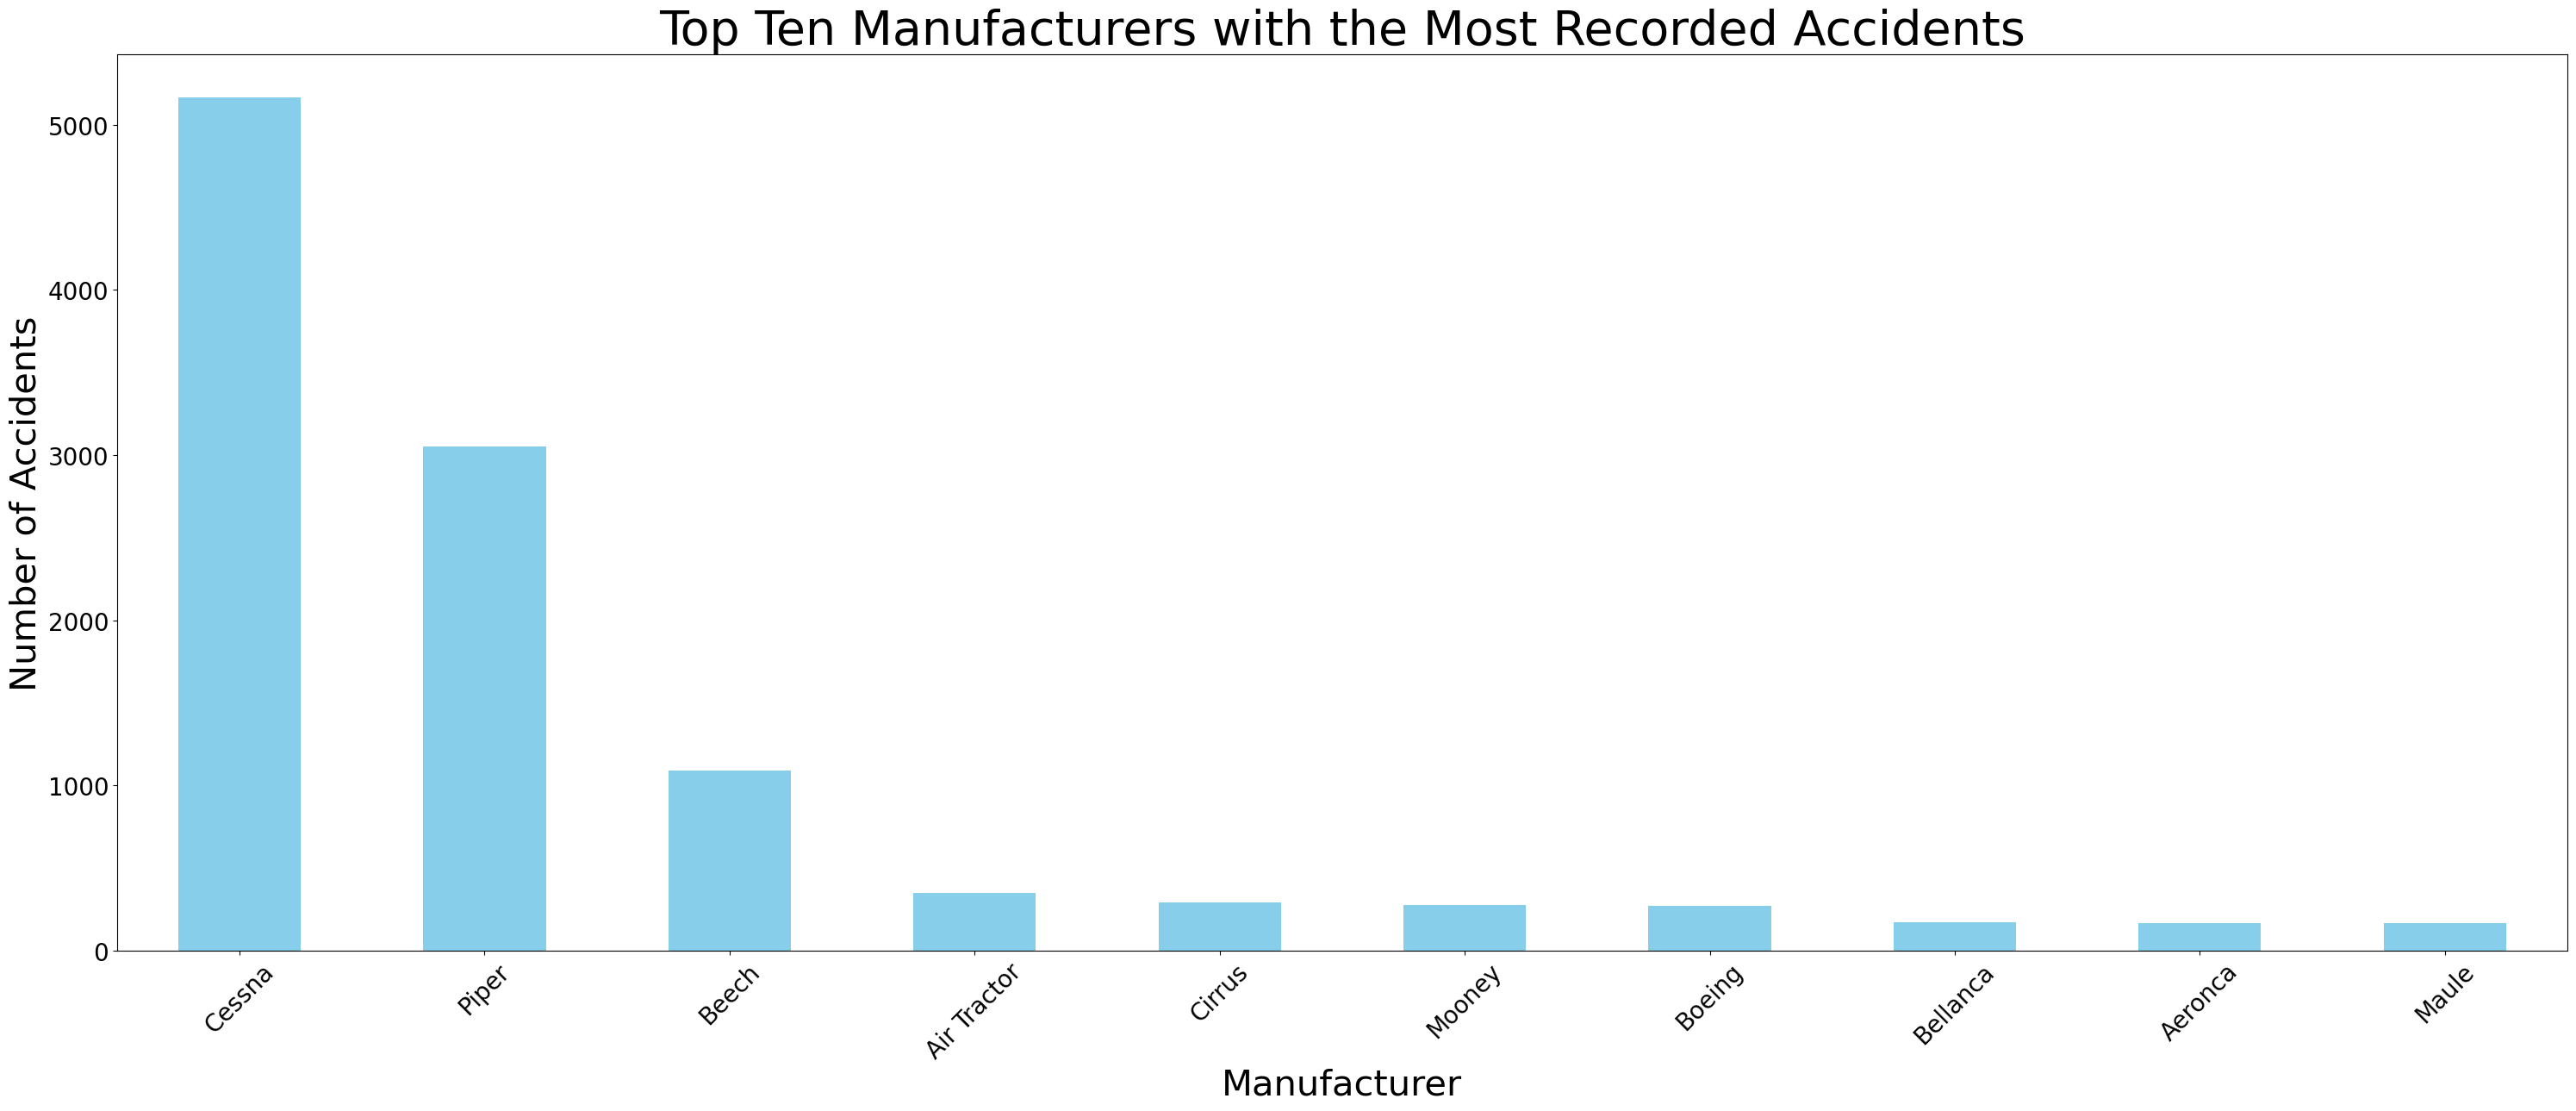

In [251]:
# Create a bar plot to visualize the Top Ten Manufacturers with the Most Recorded Accidents 
df_top_10 = df_make.head(10)

plt.figure(figsize=(30,13))
df_top_10['Count'].plot(kind='bar', color='skyblue')
plt.xlabel('Manufacturer', fontsize=30)
plt.ylabel('Number of Accidents', fontsize=30)
plt.title('Top Ten Manufacturers with the Most Recorded Accidents', fontsize=40)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
plt.show()

In [252]:
# Adding new DataFrame favorable_outcome_df and unfavorable_outcome_df
favorable_outcome_df = df[(df['Total Uninjured'] > 10) & (df['Injury Severity'] == 'Non-Fatal')]
unfavorable_outcome_df = df[(df['Aircraft Damage'] == 'Destroyed') & (df['Injury Severity'] == 'Fatal')]
unfavorable_outcome_df.head(10)

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count,Favorable Result,Unfavorable Result
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal,Destroyed,...,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1,0,1
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal,Destroyed,...,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1,0,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal,Destroyed,...,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1,0,1
62114,20070510X00546,Accident,DFW07LA160,2007-02-28,"Carlsbad, Nm",United States,NaN,NaN,Fatal,Destroyed,...,2,2007,Ingraham RV-6,1.0,0.0,Carlsbad,NM,1,0,1
62139,20070316X00301,Accident,LAX07FA103,2007-03-07,"Tooele, Ut",United States,NaN,NaN,Fatal,Destroyed,...,3,2007,Piper PA-28-235,3.0,0.0,Tooele,UT,1,0,1
62458,20070508X00524,Accident,LAX07FA150,2007-05-03,"Dillon, Mt",United States,DLN,Dillon,Fatal,Destroyed,...,5,2007,Cessna S550,2.0,0.0,Dillon,MT,1,0,1
63245,20080204X00135,Accident,NYC07FAMS1,2007-08-25,"Westhampton, Ny",United States,NaN,NaN,Fatal,Destroyed,...,8,2007,Piper PA-32-260,1.0,0.0,Westhampton,NY,1,0,1
63290,20070907X01326,Accident,MIA07FA137,2007-09-01,"Elizabethton, Tn",United States,0A9,Elizabethton Municipal Airport,Fatal,Destroyed,...,9,2007,Beech A36,5.0,0.0,Elizabethton,TN,1,0,1
63303,20070925X01442,Accident,NYC07LA210,2007-09-02,"Hazleton, Pa",United States,KHZL,Hazleton Minicipal,Fatal,Destroyed,...,9,2007,Cessna 150J,1.0,0.0,Hazleton,PA,1,0,1
63329,20070917X01406,Accident,NYC07FA217,2007-09-06,"Syria, Va",United States,NaN,NaN,Fatal,Destroyed,...,9,2007,Piper PA-28-140,3.0,0.0,Syria,VA,1,0,1


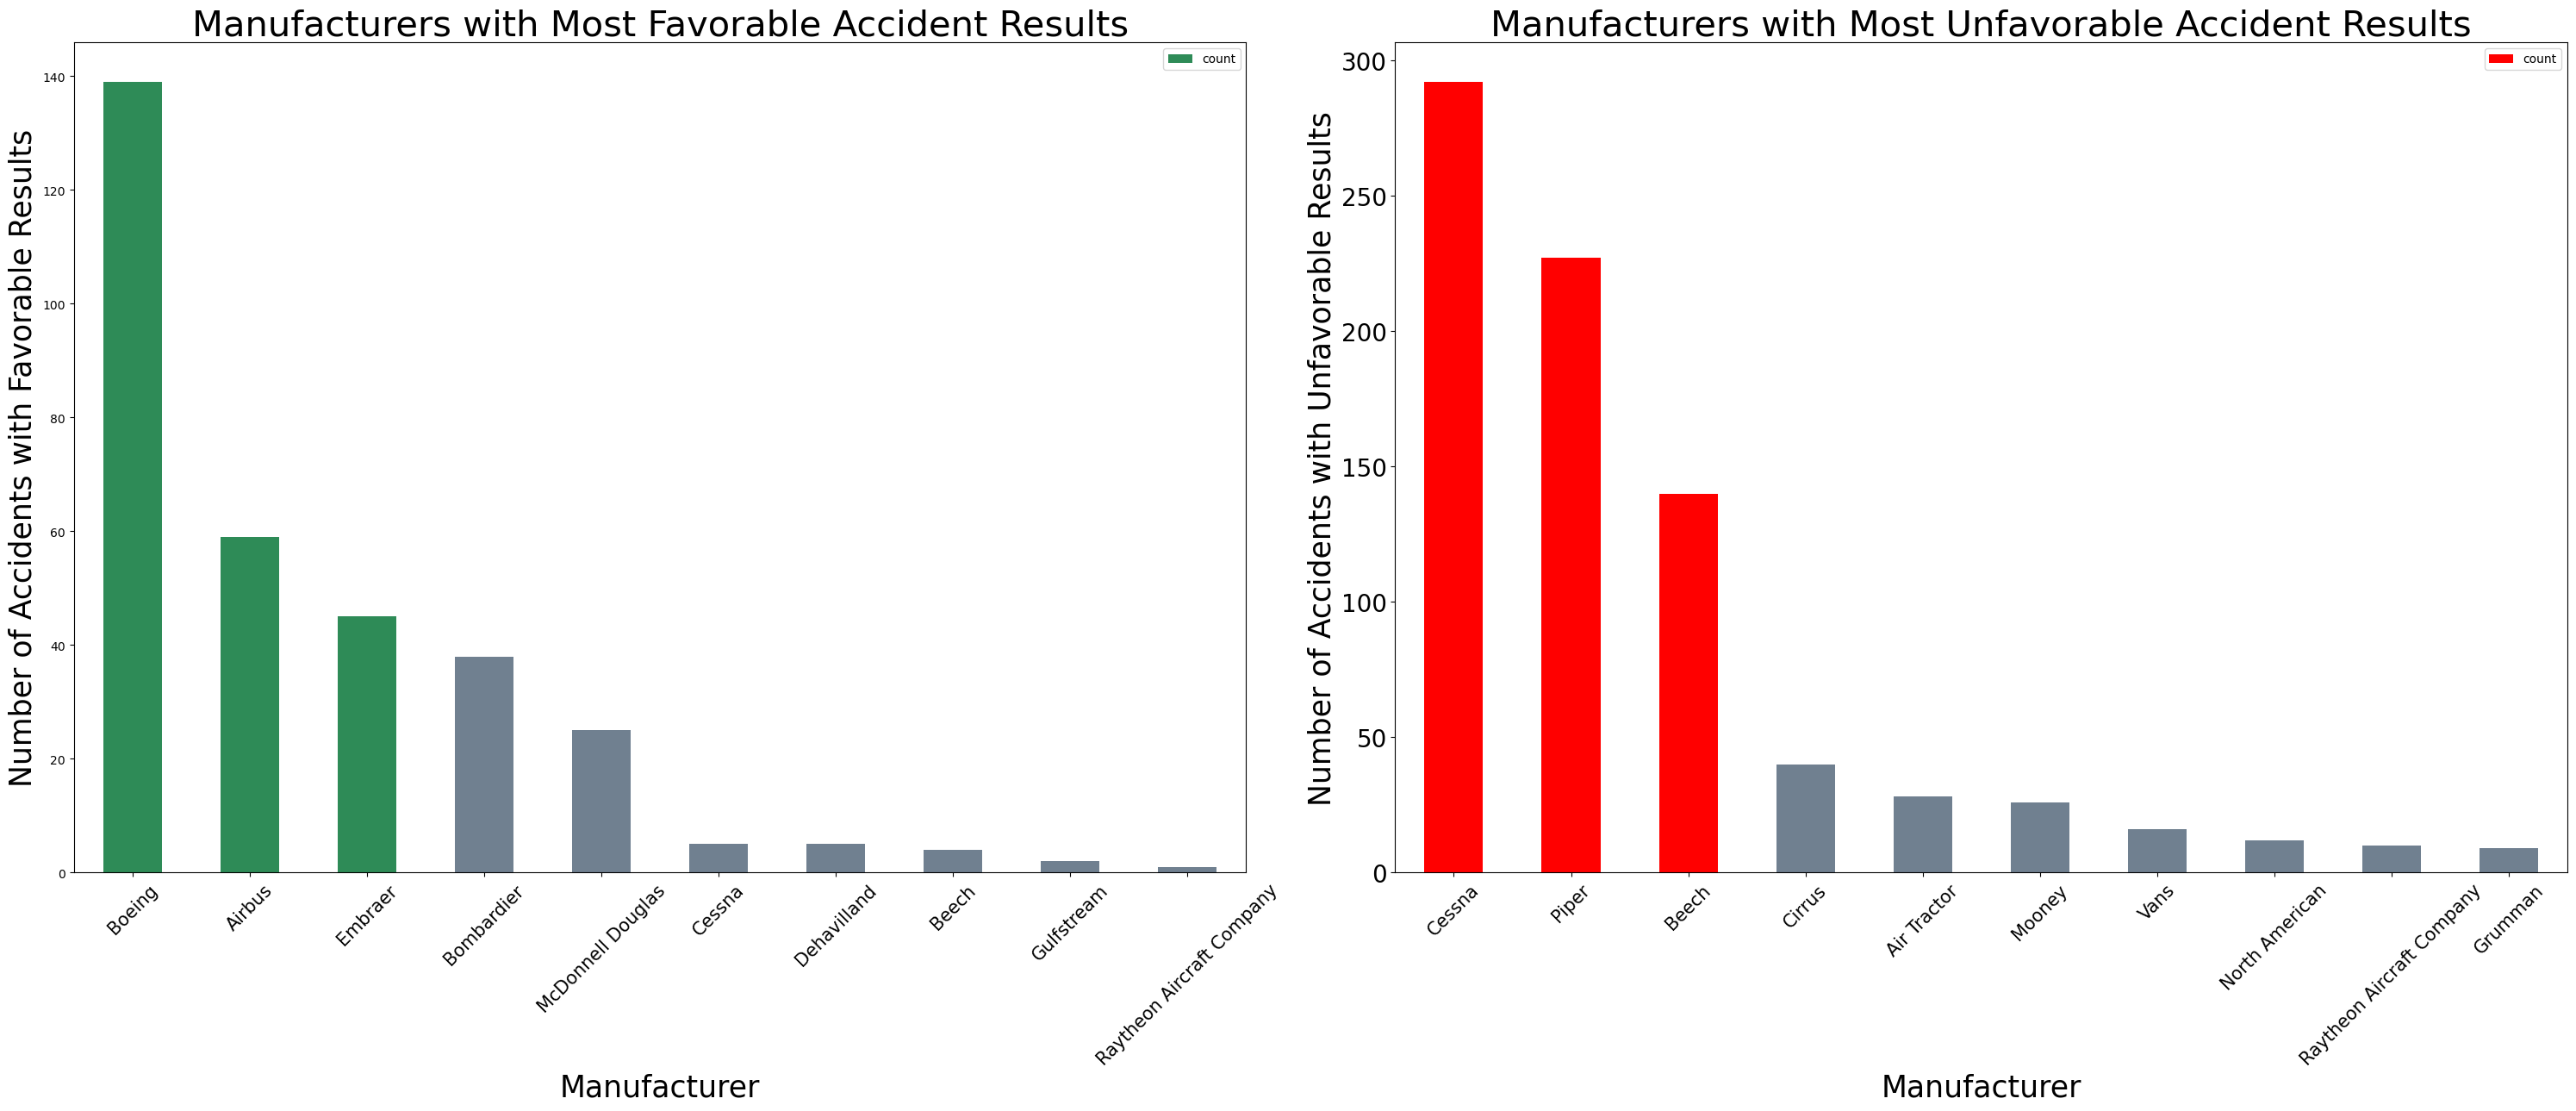

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(30, 13))

good_countss = favorable_outcome_df['Make'].value_counts()
top_10_make_counts_good = good_countss.head(10)

#Plot the first graph (favorable_outcome)
top_10_make_counts_good.plot(kind='bar', color=['#2E8B57','#2E8B57', '#2E8B57', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey'], ax=axes[0])
axes[0].set_xlabel('Manufacturer', fontsize=25)
axes[0].set_ylabel('Number of Accidents with Favorable Results', fontsize=25)
axes[0].set_title('Manufacturers with Most Favorable Accident Results',fontsize=30)
axes[0].set_xticklabels(top_10_make_counts_good.index, rotation=45, fontsize=15)
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].legend()


bad_countss = unfavorable_outcome_df['Make'].value_counts()
top_10_make_counts_bad = bad_countss.head(10)

#Plot the second graph (unfavorable_outcome)
top_10_make_counts_bad.plot(kind='bar', color=['red', 'red', 'red', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey'], ax=axes[1])
axes[1].set_xlabel('Manufacturer', fontsize=25)
axes[1].set_ylabel('Number of Accidents with Unfavorable Results', fontsize=25)
axes[1].set_title('Manufacturers with Most Unfavorable Accident Results', fontsize=30)
axes[1].set_xticklabels(top_10_make_counts_bad.index, rotation=45, fontsize=15)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].legend()
plt.yticks(rotation=0, fontsize=20)

plt.tight_layout()
plt.show()

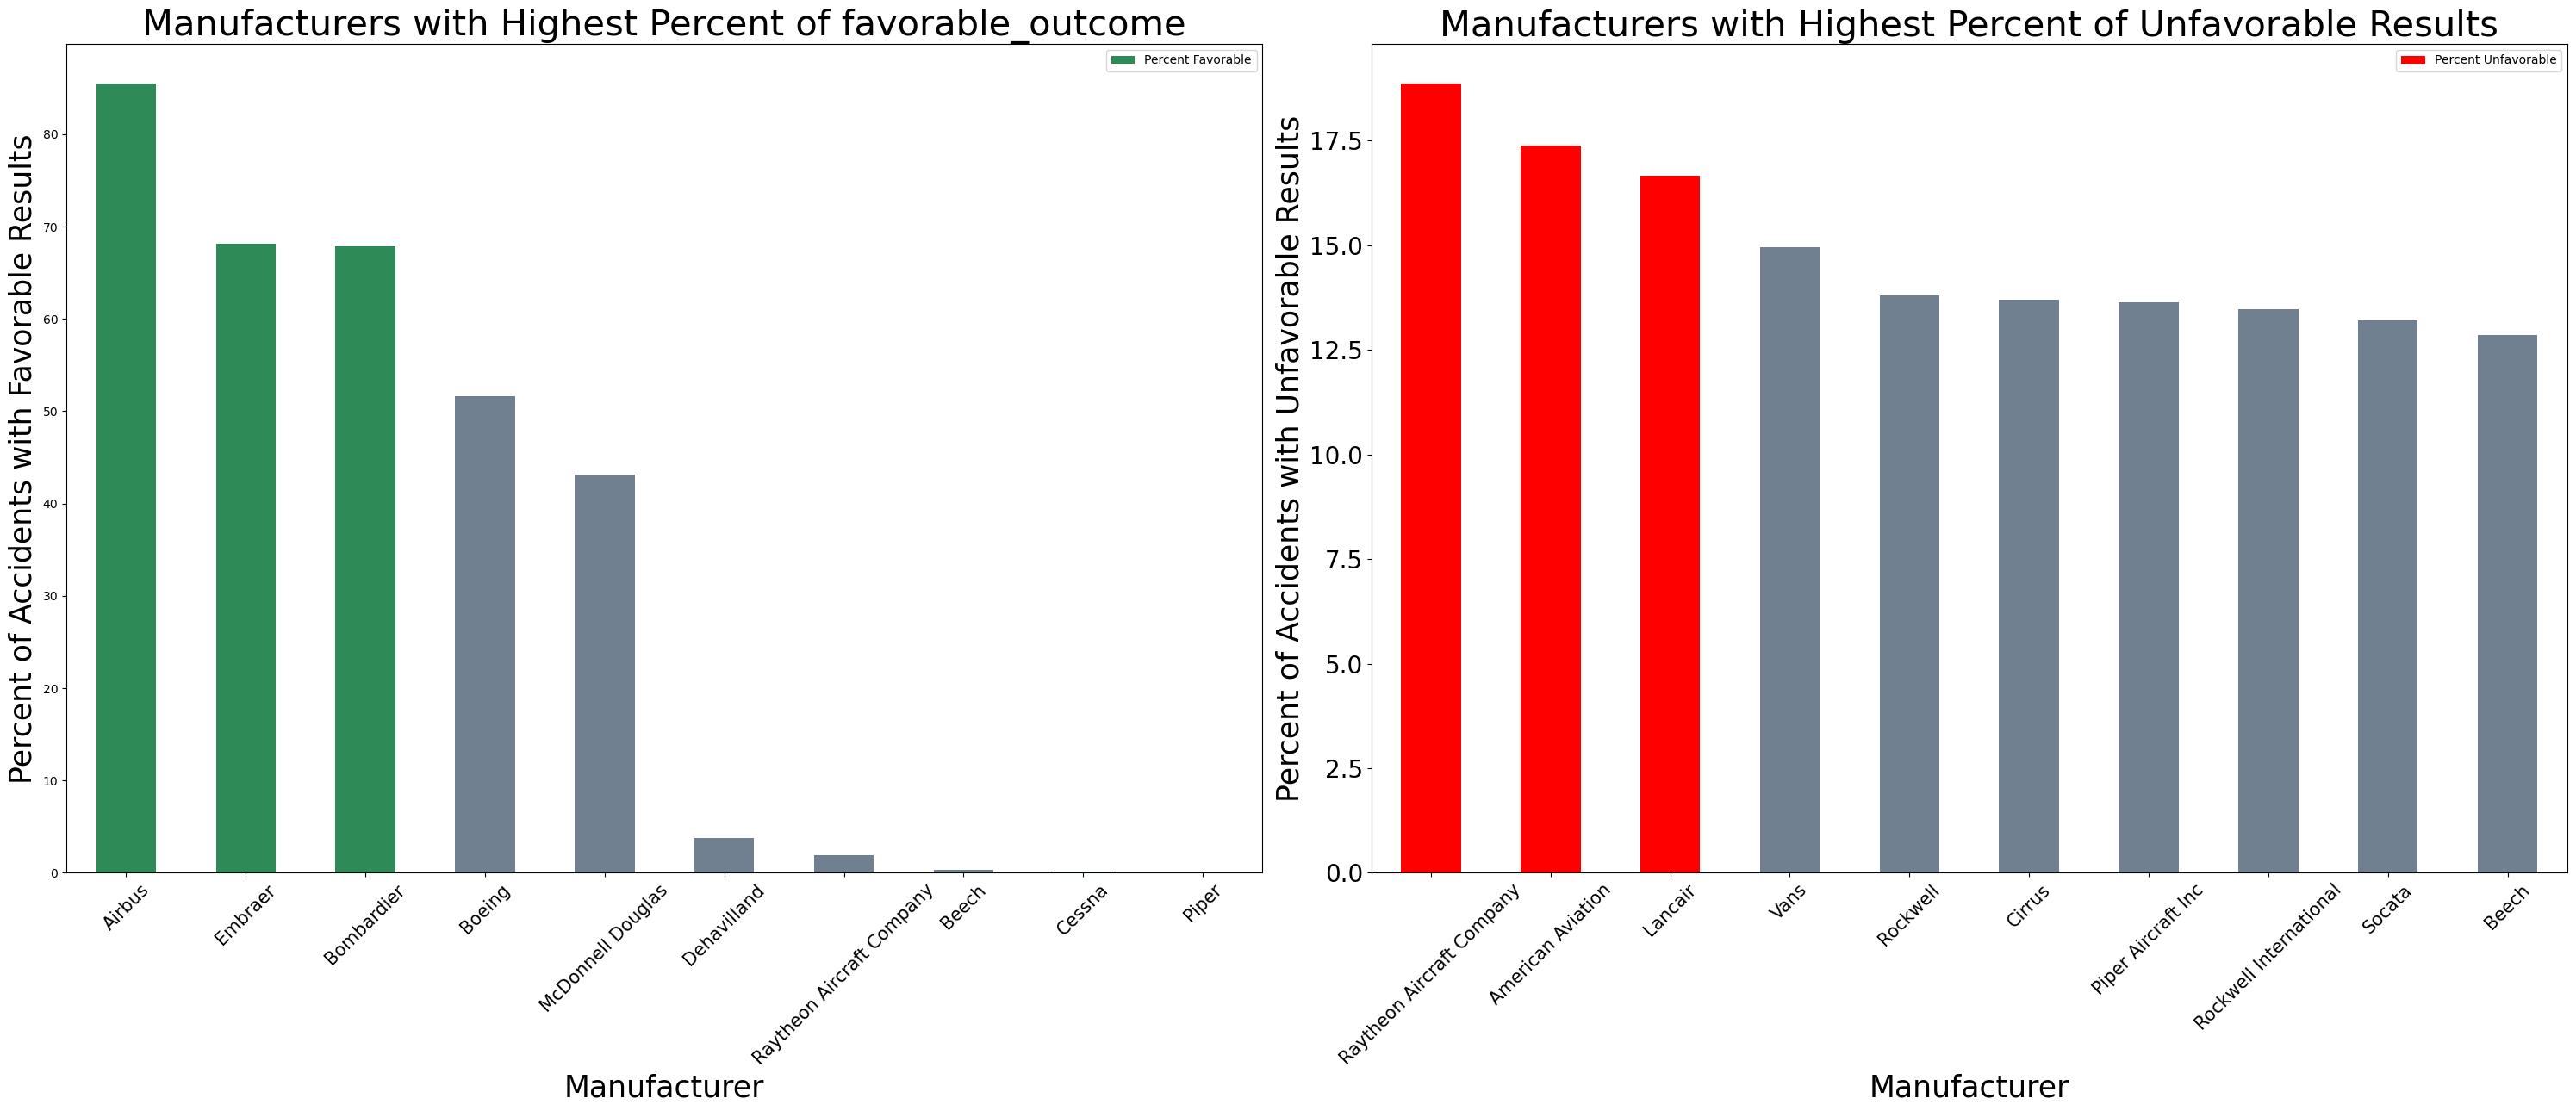

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(30, 13))

top_10_percent = df_make[df_make['Count'] >= 20]
top_10_percent = top_10_percent['Percent Favorable'].sort_values(ascending=False).head(10)

#Plot the first graph (favorable results)
top_10_percent.plot(kind='bar', color=['#2E8B57','#2E8B57', '#2E8B57', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey'], ax=axes[0])
axes[0].set_xlabel('Manufacturer', fontsize=25)
axes[0].set_ylabel('Percent of Accidents with Favorable Results', fontsize=25)
axes[0].set_title('Manufacturers with Highest Percent of favorable_outcome',fontsize=30)
axes[0].set_xticklabels(top_10_percent.index, rotation=45, fontsize=15)
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].legend()


top_10_unfav_percent = df_make[df_make['Count'] >= 20]
top_10_unfav_percent = top_10_unfav_percent['Percent Unfavorable'].sort_values(ascending=False).head(10)

#Plot the second graph (unfavorable results)
top_10_unfav_percent.plot(kind='bar', color=['red', 'red', 'red', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey', 'slategrey'], ax=axes[1])
axes[1].set_xlabel('Manufacturer', fontsize=25)
axes[1].set_ylabel('Percent of Accidents with Unfavorable Results', fontsize=25)
axes[1].set_title('Manufacturers with Highest Percent of Unfavorable Results', fontsize=30)
axes[1].set_xticklabels(top_10_unfav_percent.index, rotation=45, fontsize=15)
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].legend()
plt.yticks(rotation=0, fontsize=20)

plt.tight_layout()
plt.show()

In [255]:
#Adding new DataFrame df_make_2
df_make_2 = df_make[df_make['Count'] >= 15]
df_make_2.sort_values(by='Percent Favorable', ascending=False)

,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Favorable,Percent Unfavorable
Make,,,,,,,,,,,
Airbus,2.0,37.0,50.0,10694.0,10783.0,10781.0,69,59,1,85.507246,1.449275
Embraer,3.0,29.0,36.0,2891.0,2959.0,2956.0,66,45,1,68.181818,1.515152
Bombardier,55.0,45.0,25.0,2646.0,2771.0,2716.0,56,38,2,67.857143,3.571429
Boeing,29.0,522.0,178.0,22698.0,23427.0,23398.0,269,139,7,51.672862,2.602230
McDonnell Douglas,10.0,26.0,19.0,2965.0,3020.0,3010.0,58,25,1,43.103448,1.724138
...,...,...,...,...,...,...,...,...,...,...,...
Rans,18.0,10.0,8.0,21.0,57.0,39.0,42,0,4,0.000000,9.523810
Zenith,11.0,11.0,4.0,33.0,59.0,48.0,42,0,5,0.000000,11.904762
Aviat,4.0,11.0,4.0,37.0,56.0,52.0,39,0,2,0.000000,5.128205


## Additional Boeing Analysis

In [256]:
#Adding new DataFrame boeing_df
boeing_df = df[df['Make'] == 'Boeing'].copy()
boeing_df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count,Favorable Result,Unfavorable Result
59362,20050921X01501,Accident,DCA05MA095,2005-08-19,"Agana, Gu",United States,GUM,Guam-Antonio B. Won Pat,Non-Fatal,Substantial,...,8,2005,Boeing 747-200,340.0,340.0,Agana,GU,1,1,0
63845,20071231X02013,Accident,CHI08FA050,2007-12-14,"Chicago, Il",United States,ORD,Chicago O'Hare Intl,Non-Fatal,Minor,...,12,2007,Boeing 777-222,264.0,264.0,Chicago,IL,1,1,0
64112,20080413X00464,Accident,NYC08CA115,2008-02-23,"Valdosta, Ga",United States,MCO,Orlando International,Non-Fatal,NaN,...,2,2008,Boeing 737-700,103.0,103.0,Valdosta,GA,1,1,0
64303,20080722X01094,Accident,NYC08CA156,2008-04-07,"Miami, Fl",United States,MIA,Miami International Airport,Non-Fatal,NaN,...,4,2008,Boeing 737-823,148.0,148.0,Miami,FL,1,1,0
64341,20080417X00501,Accident,CHI08LA102,2008-04-14,"Youngstown, Oh",United States,4G4,Youngstown Elser Airport,Non-Fatal,Substantial,...,4,2008,Boeing E75N1,2.0,2.0,Youngstown,OH,1,0,0


In [257]:
#Adding new DataFrame boeing_df_model
boeing_df_model = boeing_df.groupby(by='Make & Model').sum(numeric_only=True)
boeing_df_model = boeing_df_model[boeing_df_model['Total Passengers'] >= 30].copy()
boeing_df_model.sort_values(by='Count', ascending=False)

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result
Make & Model,,,,,,,,,,,,
Boeing A75N1(PT17),27.0,2.0,6.0,5.0,38.0,201,56429,51.0,49.0,28,0,1
Boeing 737,46.0,0.0,14.0,10.0,2987.0,162,52429,3011.0,3011.0,26,19,0
Boeing 737 7H4,28.0,1.0,133.0,15.0,1506.0,111,28207,1655.0,1654.0,14,11,0
Boeing 757,22.0,0.0,1.0,3.0,1613.0,86,24207,1617.0,1617.0,12,9,0
Boeing 767,20.0,3.0,51.0,8.0,1728.0,75,24169,1790.0,1787.0,12,9,1
Boeing 737-8H4,12.0,0.0,1.0,5.0,771.0,51,14128,777.0,777.0,7,5,0
Boeing 777,4.0,0.0,1.0,4.0,742.0,45,12111,747.0,747.0,6,3,0
Boeing 737-7H4,12.0,0.0,5.0,5.0,684.0,38,12075,694.0,694.0,6,5,0
Boeing 717-200,8.0,0.0,1.0,3.0,414.0,36,8052,418.0,418.0,4,4,0


In [258]:
# Calculating percentage and adding new columns 
boeing_df_model['Percent Fatal Injuries'] = (boeing_df_model['Total Fatal Injuries'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Serious Injuries'] = (boeing_df_model['Total Serious Injuries'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Minor Injuries'] = (boeing_df_model['Total Minor Injuries'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Uninjured'] = (boeing_df_model['Total Uninjured'] / boeing_df_model['Total Passengers'])*100
boeing_df_model['Percent Survivors'] = (boeing_df_model['Total Survivors'] / boeing_df_model['Total Passengers'])*100
boeing_df_model.sort_values(by='Total Passengers', ascending=False, inplace=True)

In [259]:
boeing_df_model.sort_values(by='Percent Uninjured', ascending=False, inplace=True)

In [260]:
boeing_df_model.reset_index(inplace=True)

In [261]:
# Adding new column Consolidated
boeing_df_model['Consolidated'] = [str(x[:10]) for x in boeing_df_model['Make & Model']]
boeing_df_model

,Make & Model,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors,Consolidated
0,Boeing 777-300,2.0,0.0,0.0,0.0,311.0,8,2008,311.0,311.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 777
1,Boeing 757-351,2.0,0.0,0.0,0.0,352.0,12,2008,352.0,352.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757
2,Boeing DHC-8-102,2.0,0.0,0.0,0.0,36.0,1,2012,36.0,36.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing DHC
3,Boeing 757-224,2.0,0.0,0.0,0.0,172.0,9,2021,172.0,172.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757
4,Boeing 737 76Q,2.0,0.0,0.0,0.0,121.0,4,2016,121.0,121.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737
5,Boeing 737-732,4.0,0.0,0.0,0.0,577.0,17,4022,577.0,577.0,2,2,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737
6,Boeing 767-375,2.0,0.0,0.0,0.0,140.0,9,2017,140.0,140.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 767
7,Boeing 757-223,2.0,0.0,0.0,0.0,160.0,10,2010,160.0,160.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757
8,Boeing 757-222,6.0,0.0,0.0,1.0,531.0,23,6033,532.0,532.0,3,3,0,0.000000,0.000000,0.187970,99.812030,100.000000,Boeing 757
9,Boeing 737 3H4,6.0,0.0,0.0,1.0,419.0,30,6046,420.0,420.0,3,3,0,0.000000,0.000000,0.238095,99.761905,100.000000,Boeing 737


In [262]:
boeing_df_model['Consolidated'].replace('Boeing DC-', 'Boeing DC-10', inplace=True)
boeing_df_model['Consolidated'].replace('Boeing DHC', 'Boeing DHC-8-102', inplace=True)
boeing_df_model['Consolidated'].replace('Boeing Com', 'Boeing 777', inplace=True)
boeing_df_model['Consolidated'].replace('Boeing Of ', 'Boeing DHC-8-311', inplace=True)
boeing_df_model

,Make & Model,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors,Consolidated
0,Boeing 777-300,2.0,0.0,0.0,0.0,311.0,8,2008,311.0,311.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 777
1,Boeing 757-351,2.0,0.0,0.0,0.0,352.0,12,2008,352.0,352.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757
2,Boeing DHC-8-102,2.0,0.0,0.0,0.0,36.0,1,2012,36.0,36.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing DHC-8-102
3,Boeing 757-224,2.0,0.0,0.0,0.0,172.0,9,2021,172.0,172.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757
4,Boeing 737 76Q,2.0,0.0,0.0,0.0,121.0,4,2016,121.0,121.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737
5,Boeing 737-732,4.0,0.0,0.0,0.0,577.0,17,4022,577.0,577.0,2,2,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 737
6,Boeing 767-375,2.0,0.0,0.0,0.0,140.0,9,2017,140.0,140.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 767
7,Boeing 757-223,2.0,0.0,0.0,0.0,160.0,10,2010,160.0,160.0,1,1,0,0.000000,0.000000,0.000000,100.000000,100.000000,Boeing 757
8,Boeing 757-222,6.0,0.0,0.0,1.0,531.0,23,6033,532.0,532.0,3,3,0,0.000000,0.000000,0.187970,99.812030,100.000000,Boeing 757
9,Boeing 737 3H4,6.0,0.0,0.0,1.0,419.0,30,6046,420.0,420.0,3,3,0,0.000000,0.000000,0.238095,99.761905,100.000000,Boeing 737


In [263]:
#Adding new DataFrame boeing_families_df
boeing_families_df = boeing_df_model.groupby(by='Consolidated').sum(numeric_only=True)
columns_to_drop = ['Percent Fatal Injuries', 'Percent Serious Injuries', 'Percent Minor Injuries', 'Percent Uninjured', 'Percent Survivors']
boeing_families_df = boeing_families_df.drop(columns=columns_to_drop)
boeing_families_df

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result
Consolidated,,,,,,,,,,,,
Boeing 717,10.0,0.0,1.0,4.0,523.0,47,10068,528.0,528.0,5,5,0
Boeing 737,168.0,1.0,218.0,63.0,10856.0,612,177359,11138.0,11137.0,88,74,0
Boeing 747,16.0,0.0,25.0,3.0,601.0,20,8037,629.0,629.0,4,3,0
Boeing 757,48.0,0.0,3.0,9.0,4011.0,175,50369,4023.0,4023.0,25,22,0
Boeing 767,32.0,3.0,62.0,13.0,2853.0,120,36251,2931.0,2928.0,18,15,1
Boeing 777,24.0,3.0,169.0,62.0,3005.0,117,32241,3239.0,3236.0,16,12,1
Boeing 787,2.0,0.0,0.0,2.0,440.0,13,4034,442.0,442.0,2,2,0
Boeing A75,27.0,2.0,6.0,5.0,38.0,201,56429,51.0,49.0,28,0,1
Boeing DC-10,3.0,0.0,11.0,1.0,168.0,5,2009,180.0,180.0,1,1,0


In [264]:
boeing_families_df['Percent Fatal Injuries'] = (boeing_families_df['Total Fatal Injuries'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Serious Injuries'] = (boeing_families_df['Total Serious Injuries'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Minor Injuries'] = (boeing_families_df['Total Minor Injuries'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Uninjured'] = (boeing_families_df['Total Uninjured'] / boeing_families_df['Total Passengers'])*100
boeing_families_df['Percent Survivors'] = (boeing_families_df['Total Survivors'] / boeing_families_df['Total Passengers'])*100
boeing_families_df.sort_values(by='Total Passengers', ascending=False, inplace=True)
boeing_families_df

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
Consolidated,,,,,,,,,,,,,,,,,
Boeing 737,168.0,1.0,218.0,63.0,10856.0,612,177359,11138.0,11137.0,88,74,0,0.008978,1.957263,0.565631,97.468127,99.991022
Boeing 757,48.0,0.0,3.0,9.0,4011.0,175,50369,4023.0,4023.0,25,22,0,0.000000,0.074571,0.223714,99.701715,100.000000
Boeing 777,24.0,3.0,169.0,62.0,3005.0,117,32241,3239.0,3236.0,16,12,1,0.092621,5.217660,1.914171,92.775548,99.907379
Boeing 767,32.0,3.0,62.0,13.0,2853.0,120,36251,2931.0,2928.0,18,15,1,0.102354,2.115319,0.443535,97.338792,99.897646
Boeing 747,16.0,0.0,25.0,3.0,601.0,20,8037,629.0,629.0,4,3,0,0.000000,3.974563,0.476948,95.548490,100.000000
Boeing 717,10.0,0.0,1.0,4.0,523.0,47,10068,528.0,528.0,5,5,0,0.000000,0.189394,0.757576,99.053030,100.000000
Boeing 787,2.0,0.0,0.0,2.0,440.0,13,4034,442.0,442.0,2,2,0,0.000000,0.000000,0.452489,99.547511,100.000000
Boeing DC-10,3.0,0.0,11.0,1.0,168.0,5,2009,180.0,180.0,1,1,0,0.000000,6.111111,0.555556,93.333333,100.000000
Boeing A75,27.0,2.0,6.0,5.0,38.0,201,56429,51.0,49.0,28,0,1,3.921569,11.764706,9.803922,74.509804,96.078431


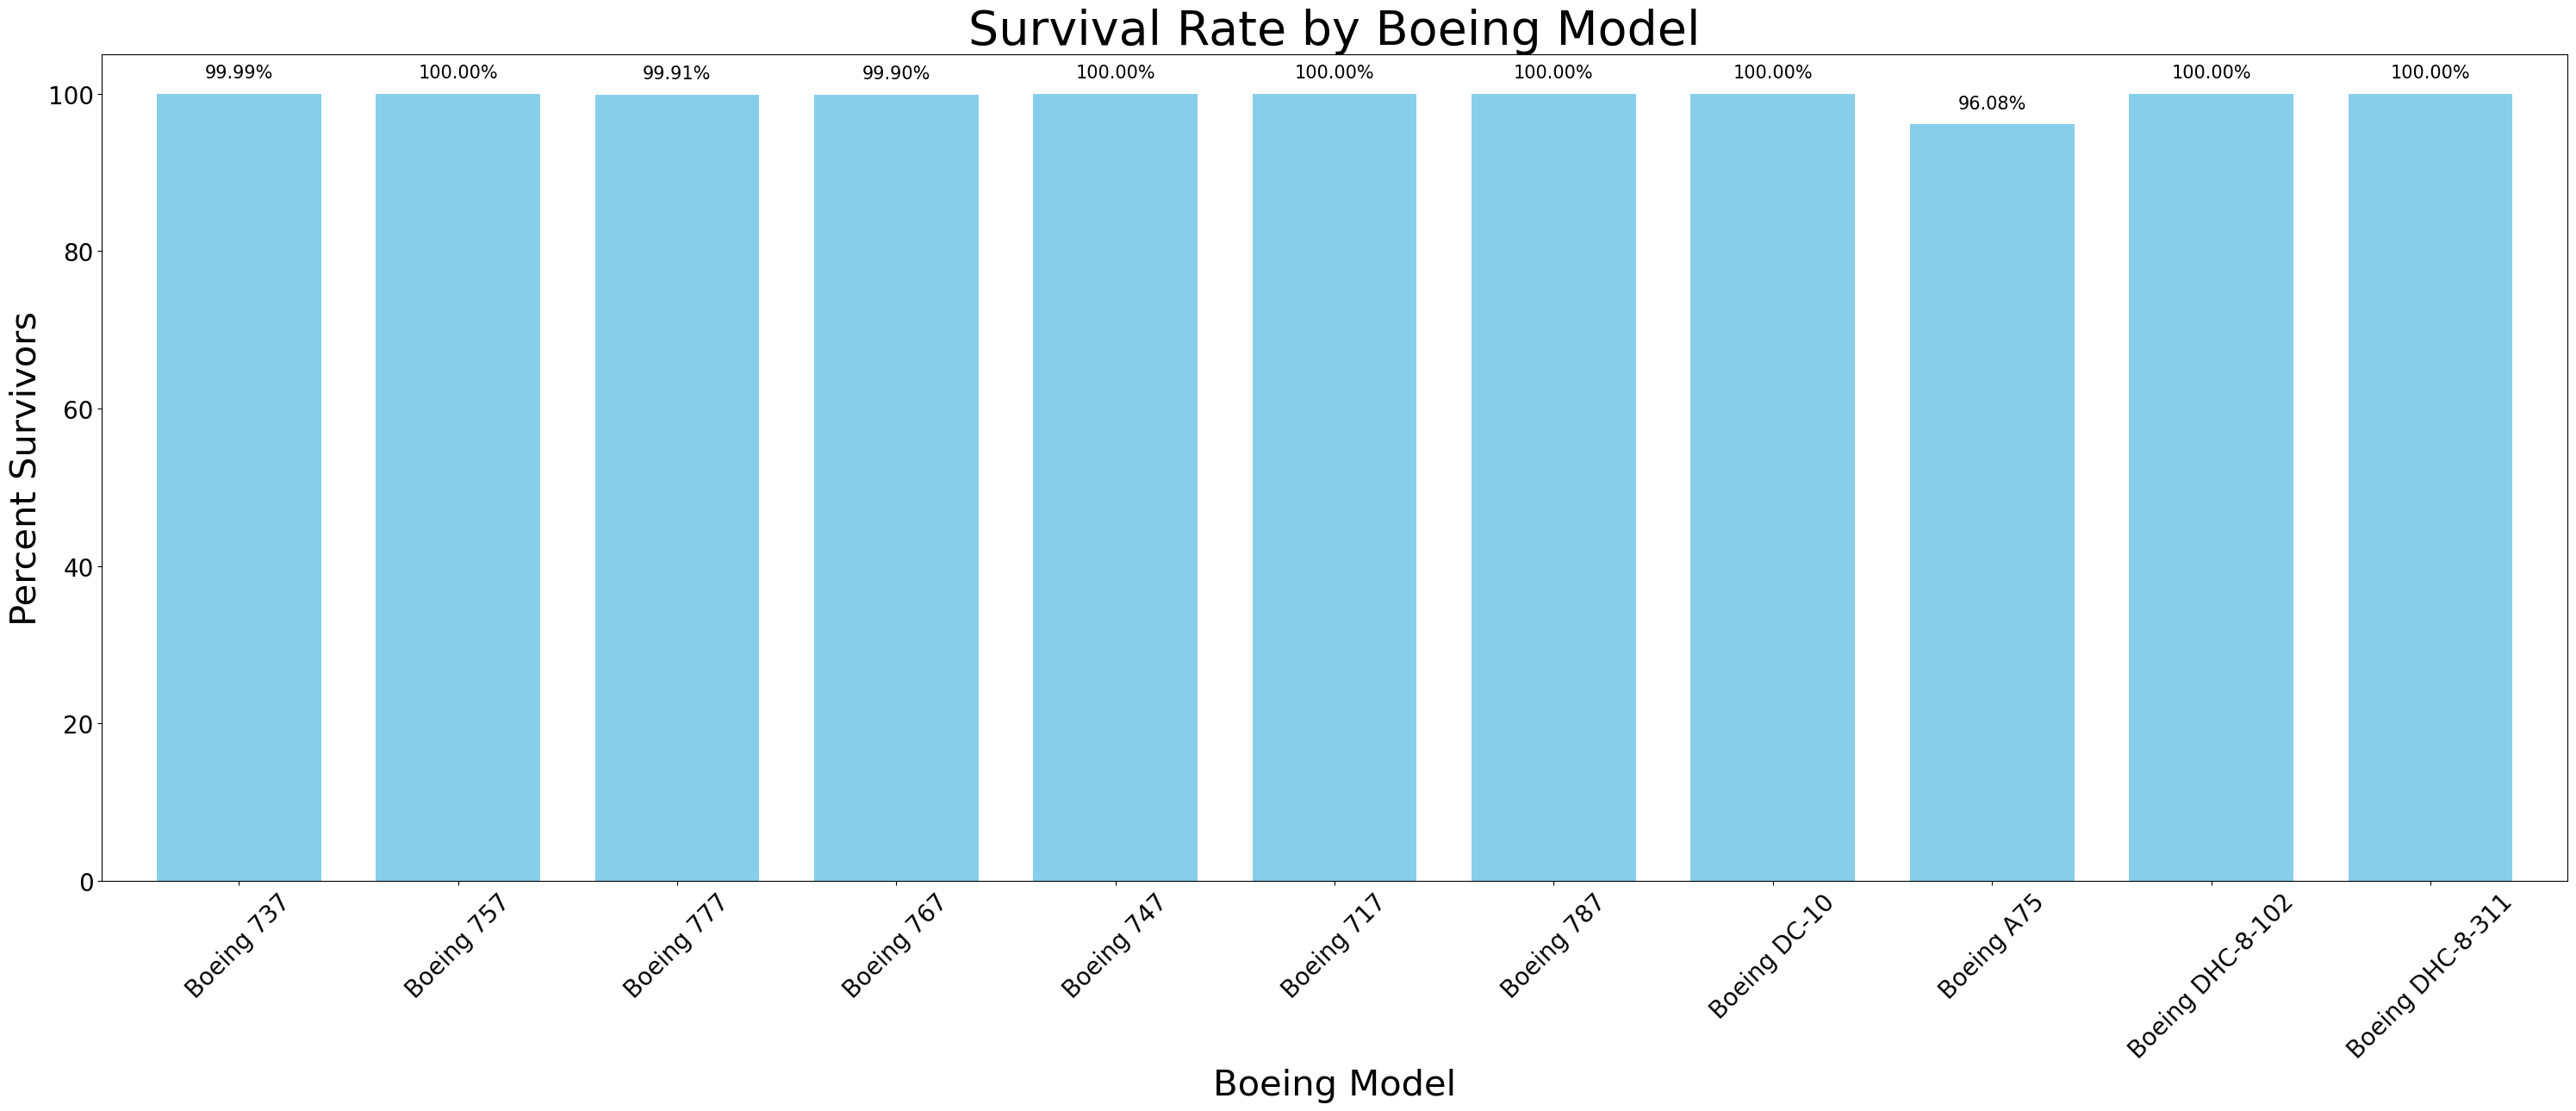

In [265]:
# Create a bar plot to visualize the Survival Rate by Boeing Model 
plt.figure(figsize=(30,13))
boeing_families_df['Percent Survivors'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Boeing Model', fontsize=30)
plt.ylabel('Percent Survivors', fontsize=30)
plt.title('Survival Rate by Boeing Model', fontsize=40)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(rotation=0,fontsize=20)
for i, v in enumerate(boeing_families_df['Percent Survivors']):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontsize=15, color='black')
    
plt.tight_layout()
plt.show()

## Additional Airbus Analysis

In [266]:
#Adding new DataFrame airbus_df
airbus_df = df[df['Make'] == 'Airbus'].copy()
airbus_df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count,Favorable Result,Unfavorable Result
63888,20080107X00025,Accident,SEA08LA051,2007-12-25,"Honolulu, Hi",United States,HNL,Honolulu International,Non-Fatal,NaN,...,12,2007,Airbus Industrie A330-323,295.0,295.0,Honolulu,HI,1,1,0
63935,20080125X00103,Accident,CHI08LA071,2008-01-09,"Detroit, Mi",United States,DTW,Detroit Metro,Non-Fatal,Substantial,...,1,2008,Airbus Industrie A319-114,73.0,73.0,Detroit,MI,1,1,0
65538,20081027X75039,Accident,DCA09FA004,2008-10-20,"Phoenix, Az",United States,PHX,Sky Harbor International,Non-Fatal,Substantial,...,10,2008,Airbus 320,162.0,162.0,Phoenix,AZ,1,1,0
65850,20090115X73226,Accident,DCA09MA026,2009-01-15,"Weehawken, Nj",United States,LGA,New York La Guardia,Non-Fatal,Substantial,...,1,2009,Airbus A320,155.0,155.0,Weehawken,NJ,1,1,0
66309,20090505X04553,Accident,DCA09FA047,2009-05-04,"Denver, Co",United States,KDEN,Denver International,Non-Fatal,Substantial,...,5,2009,Airbus A320,154.0,154.0,Denver,CO,1,1,0


In [267]:
#Adding new DataFrame airbus_df_model
airbus_df_model = airbus_df.groupby(by='Make & Model').sum(numeric_only=True)
airbus_df_model = airbus_df_model[airbus_df_model['Total Passengers'] >= 30].copy()
airbus_df_model.sort_values(by='Count', ascending=False)

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result
Make & Model,,,,,,,,,,,,
Airbus A320,14.0,0.0,4.0,10.0,869.0,38,16134,883.0,883.0,8,6,0
Airbus A321,12.0,0.0,0.0,2.0,1073.0,37,12100,1075.0,1075.0,6,6,0
Airbus A319,8.0,0.0,2.0,4.0,385.0,31,8066,391.0,391.0,4,4,0
Airbus A321 231,8.0,0.0,1.0,2.0,699.0,34,8067,702.0,702.0,4,4,0
Airbus Industrie A330-323,6.0,0.0,1.0,4.0,903.0,27,6029,908.0,908.0,3,3,0
Airbus A330 323,6.0,0.0,2.0,2.0,847.0,9,6050,851.0,851.0,3,3,0
Airbus A330,6.0,0.0,0.0,0.0,560.0,19,6047,560.0,560.0,3,2,0
Airbus A320-232,6.0,0.0,3.0,3.0,374.0,10,6042,380.0,380.0,3,3,0
Airbus Industrie A320-232,4.0,0.0,0.0,2.0,290.0,17,4042,292.0,292.0,2,2,0


In [268]:
# Calculating percentage and adding new columns
airbus_df_model['Percent Fatal Injuries'] = (airbus_df_model['Total Fatal Injuries'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Serious Injuries'] = (airbus_df_model['Total Serious Injuries'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Minor Injuries'] = (airbus_df_model['Total Minor Injuries'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Uninjured'] = (airbus_df_model['Total Uninjured'] / airbus_df_model['Total Passengers'])*100
airbus_df_model['Percent Survivors'] = (airbus_df_model['Total Survivors'] / airbus_df_model['Total Passengers'])*100
airbus_df_model.sort_values(by='Total Passengers', ascending=False, inplace=True)

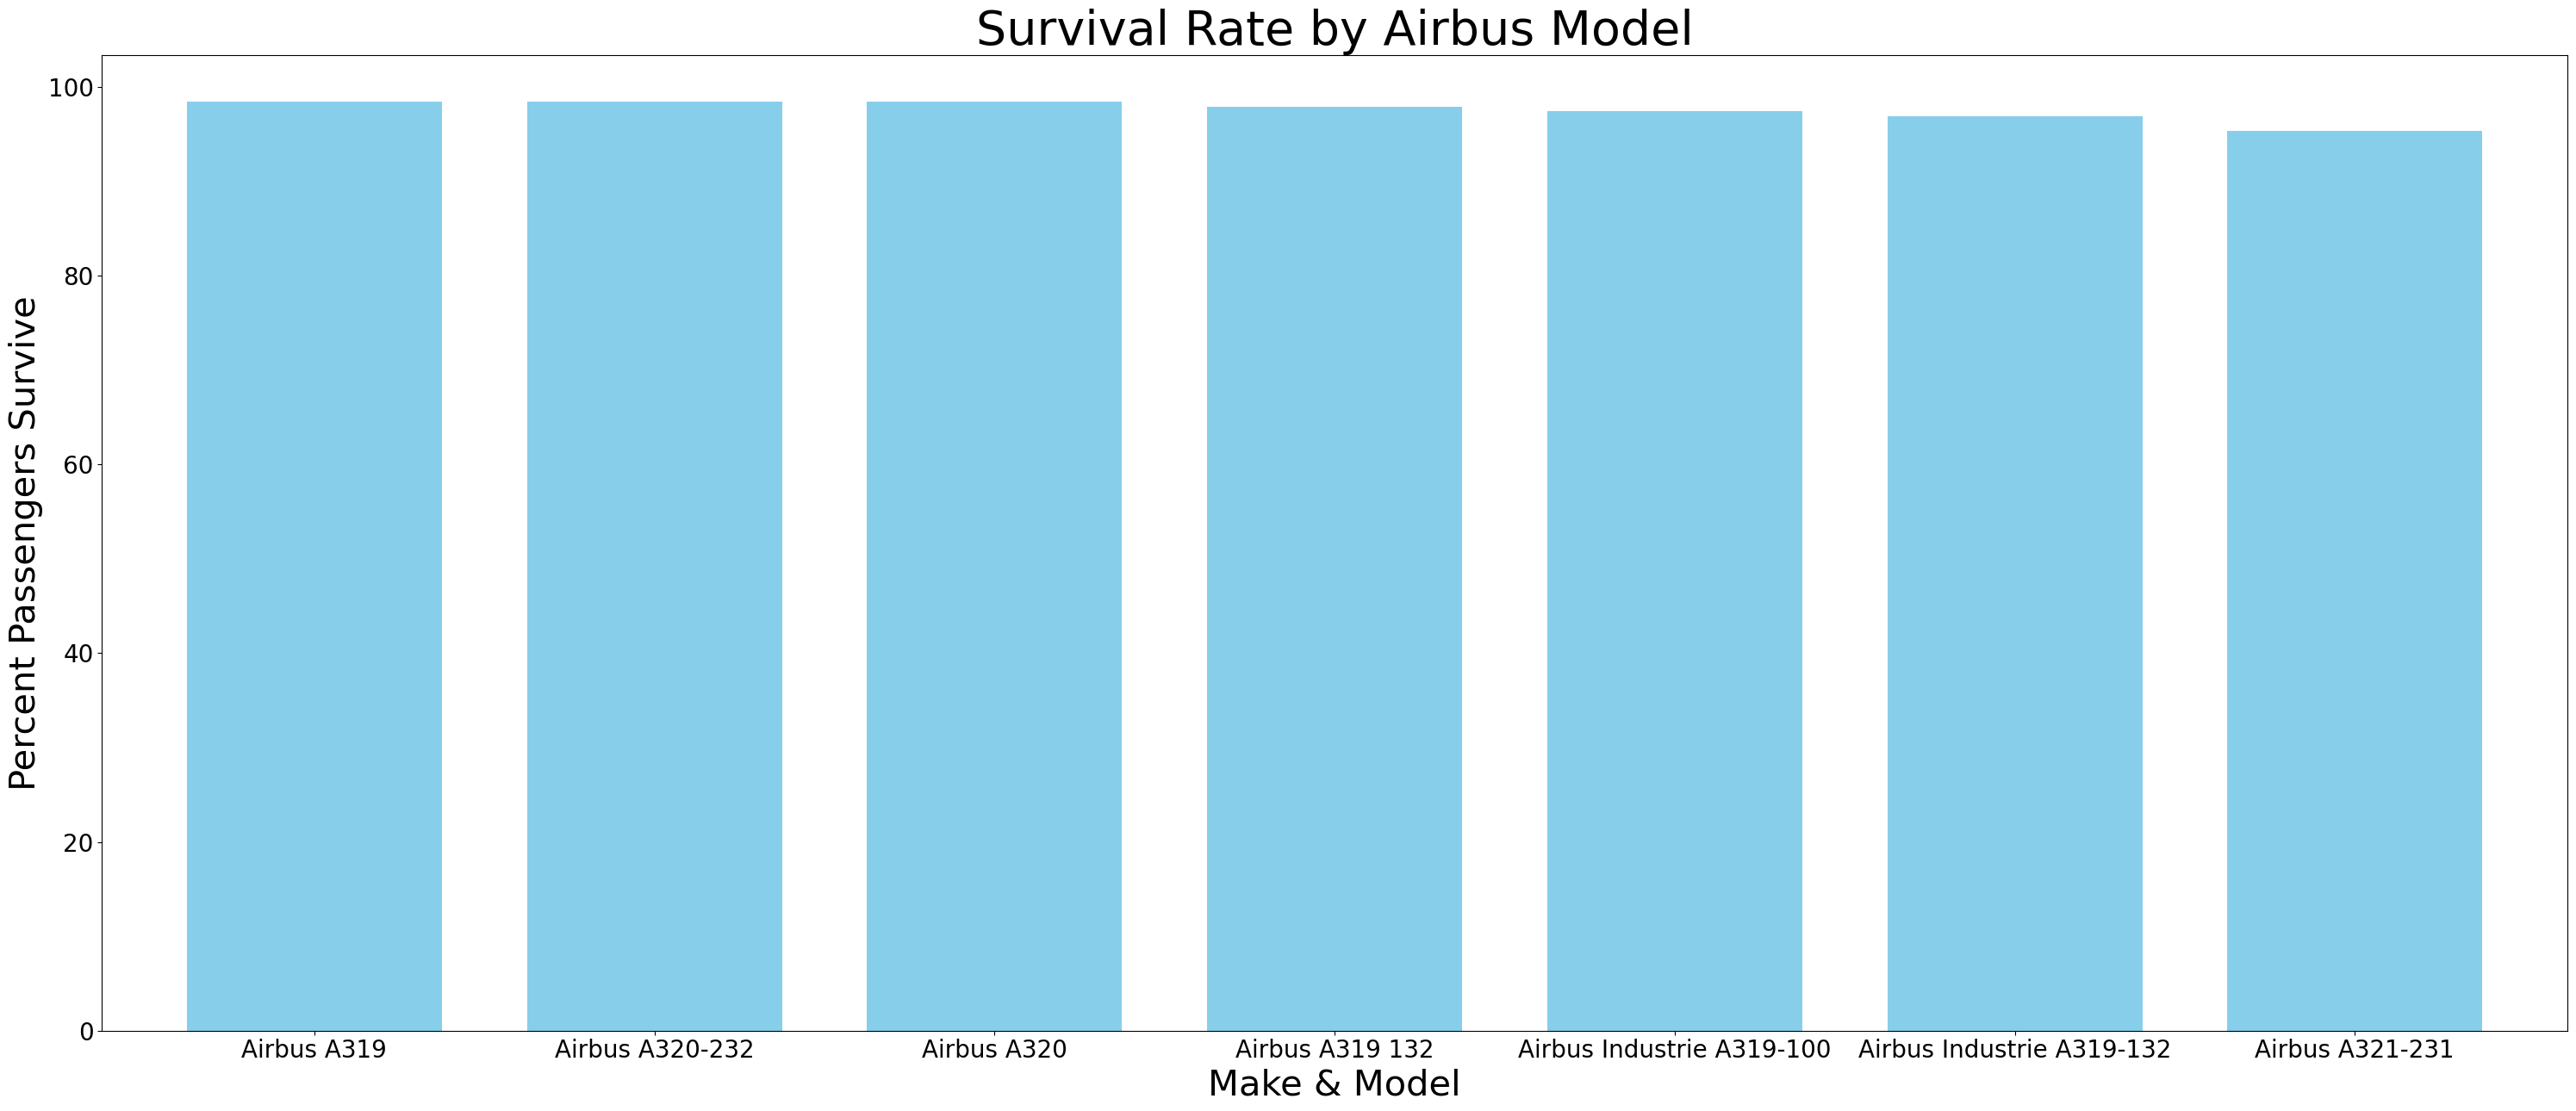

In [269]:
# Create a bar plot to visualize the Survival Rate by Airbus Model 
airbus_df_model.sort_values(by='Percent Uninjured', ascending=False, inplace=True)
least_good = airbus_df_model['Percent Uninjured'].tail(7) 
plt.figure(figsize=(30,13))
least_good.plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Make & Model', fontsize=30)
plt.ylabel('Percent Passengers Survive', fontsize=30)
plt.title('Survival Rate by Airbus Model', fontsize=40)
plt.xticks(rotation=0,fontsize=20) 
plt.yticks(rotation=0,fontsize=20)
plt.tight_layout()
plt.show()

In [270]:
airbus_df_model.reset_index(inplace=True)
airbus_df_model['Consolidated'] = [str(x[:11]) for x in airbus_df_model['Make & Model']]
airbus_df_model

,Make & Model,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors,Consolidated
0,Airbus Industrie A319-114,2.0,0.0,0.0,0.0,73.0,1,2008,73.0,73.0,1,1,0,0.0,0.000000,0.000000,100.000000,100.0,Airbus Indu
1,Airbus A321-271N,4.0,0.0,0.0,0.0,331.0,17,4039,331.0,331.0,2,2,0,0.0,0.000000,0.000000,100.000000,100.0,Airbus A321
2,Airbus Industrie A320 211,2.0,0.0,0.0,0.0,150.0,11,2011,150.0,150.0,1,1,0,0.0,0.000000,0.000000,100.000000,100.0,Airbus Indu
3,Airbus A320 - 214,2.0,0.0,0.0,0.0,154.0,3,2014,154.0,154.0,1,1,0,0.0,0.000000,0.000000,100.000000,100.0,Airbus A320
4,Airbus 321,2.0,0.0,0.0,0.0,192.0,4,2013,192.0,192.0,1,1,0,0.0,0.000000,0.000000,100.000000,100.0,Airbus 321
5,Airbus A330,6.0,0.0,0.0,0.0,560.0,19,6047,560.0,560.0,3,2,0,0.0,0.000000,0.000000,100.000000,100.0,Airbus A330
6,Airbus A340 - 300,4.0,0.0,0.0,0.0,397.0,1,2013,397.0,397.0,1,1,0,0.0,0.000000,0.000000,100.000000,100.0,Airbus A340
7,Airbus A380,4.0,0.0,0.0,1.0,576.0,6,4031,577.0,577.0,2,1,0,0.0,0.000000,0.173310,99.826690,100.0,Airbus A380
8,Airbus A321,12.0,0.0,0.0,2.0,1073.0,37,12100,1075.0,1075.0,6,6,0,0.0,0.000000,0.186047,99.813953,100.0,Airbus A321
9,Airbus A319 115,4.0,0.0,0.0,1.0,299.0,24,4032,300.0,300.0,2,1,0,0.0,0.000000,0.333333,99.666667,100.0,Airbus A319


In [271]:
# Merge same Consolidated names together 
airbus_df_model['Consolidated'].replace('Airbus 319-', 'Airbus A319', inplace=True)
airbus_df_model['Consolidated'].replace('Airbus 320', 'Airbus A320', inplace=True)
airbus_df_model['Consolidated'].replace('Airbus 321', 'Airbus A321', inplace=True)
airbus_df_model['Consolidated'].replace('Airbus Indu', 'Airbus A320', inplace=True)

In [272]:
# Adding new DataFrame airbus_families_df
airbus_families_df = airbus_df_model.groupby(by='Consolidated').sum(numeric_only=True)
airbus_families_df = airbus_families_df.drop(columns=columns_to_drop)
airbus_families_df

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result
Consolidated,,,,,,,,,,,,
Airbus A319,18.0,0.0,4.0,9.0,1204.0,76,20165,1217.0,1217.0,10,9,0
Airbus A320,56.0,0.0,11.0,29.0,4151.0,158,58414,4191.0,4191.0,29,27,0
Airbus A321,30.0,0.0,9.0,6.0,2673.0,105,30261,2688.0,2688.0,15,15,0
Airbus A330,14.0,0.0,2.0,3.0,1682.0,32,14108,1687.0,1687.0,7,6,0
Airbus A340,4.0,0.0,0.0,0.0,397.0,1,2013,397.0,397.0,1,1,0
Airbus A380,4.0,0.0,0.0,1.0,576.0,6,4031,577.0,577.0,2,1,0


In [273]:
# Calculating percentage and adding new columns
airbus_families_df['Percent Fatal Injuries'] = (airbus_families_df['Total Fatal Injuries'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Serious Injuries'] = (airbus_families_df['Total Serious Injuries'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Minor Injuries'] = (airbus_families_df['Total Minor Injuries'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Uninjured'] = (airbus_families_df['Total Uninjured'] / airbus_families_df['Total Passengers'])*100
airbus_families_df['Percent Survivors'] = (airbus_families_df['Total Survivors'] / airbus_families_df['Total Passengers'])*100
airbus_families_df.sort_values(by='Total Passengers', ascending=False, inplace=True)
airbus_families_df

,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Month,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
Consolidated,,,,,,,,,,,,,,,,,
Airbus A320,56.0,0.0,11.0,29.0,4151.0,158,58414,4191.0,4191.0,29,27,0,0.0,0.262467,0.691959,99.045574,100.0
Airbus A321,30.0,0.0,9.0,6.0,2673.0,105,30261,2688.0,2688.0,15,15,0,0.0,0.334821,0.223214,99.441964,100.0
Airbus A330,14.0,0.0,2.0,3.0,1682.0,32,14108,1687.0,1687.0,7,6,0,0.0,0.118554,0.177830,99.703616,100.0
Airbus A319,18.0,0.0,4.0,9.0,1204.0,76,20165,1217.0,1217.0,10,9,0,0.0,0.328677,0.739523,98.931800,100.0
Airbus A380,4.0,0.0,0.0,1.0,576.0,6,4031,577.0,577.0,2,1,0,0.0,0.000000,0.173310,99.826690,100.0
Airbus A340,4.0,0.0,0.0,0.0,397.0,1,2013,397.0,397.0,1,1,0,0.0,0.000000,0.000000,100.000000,100.0


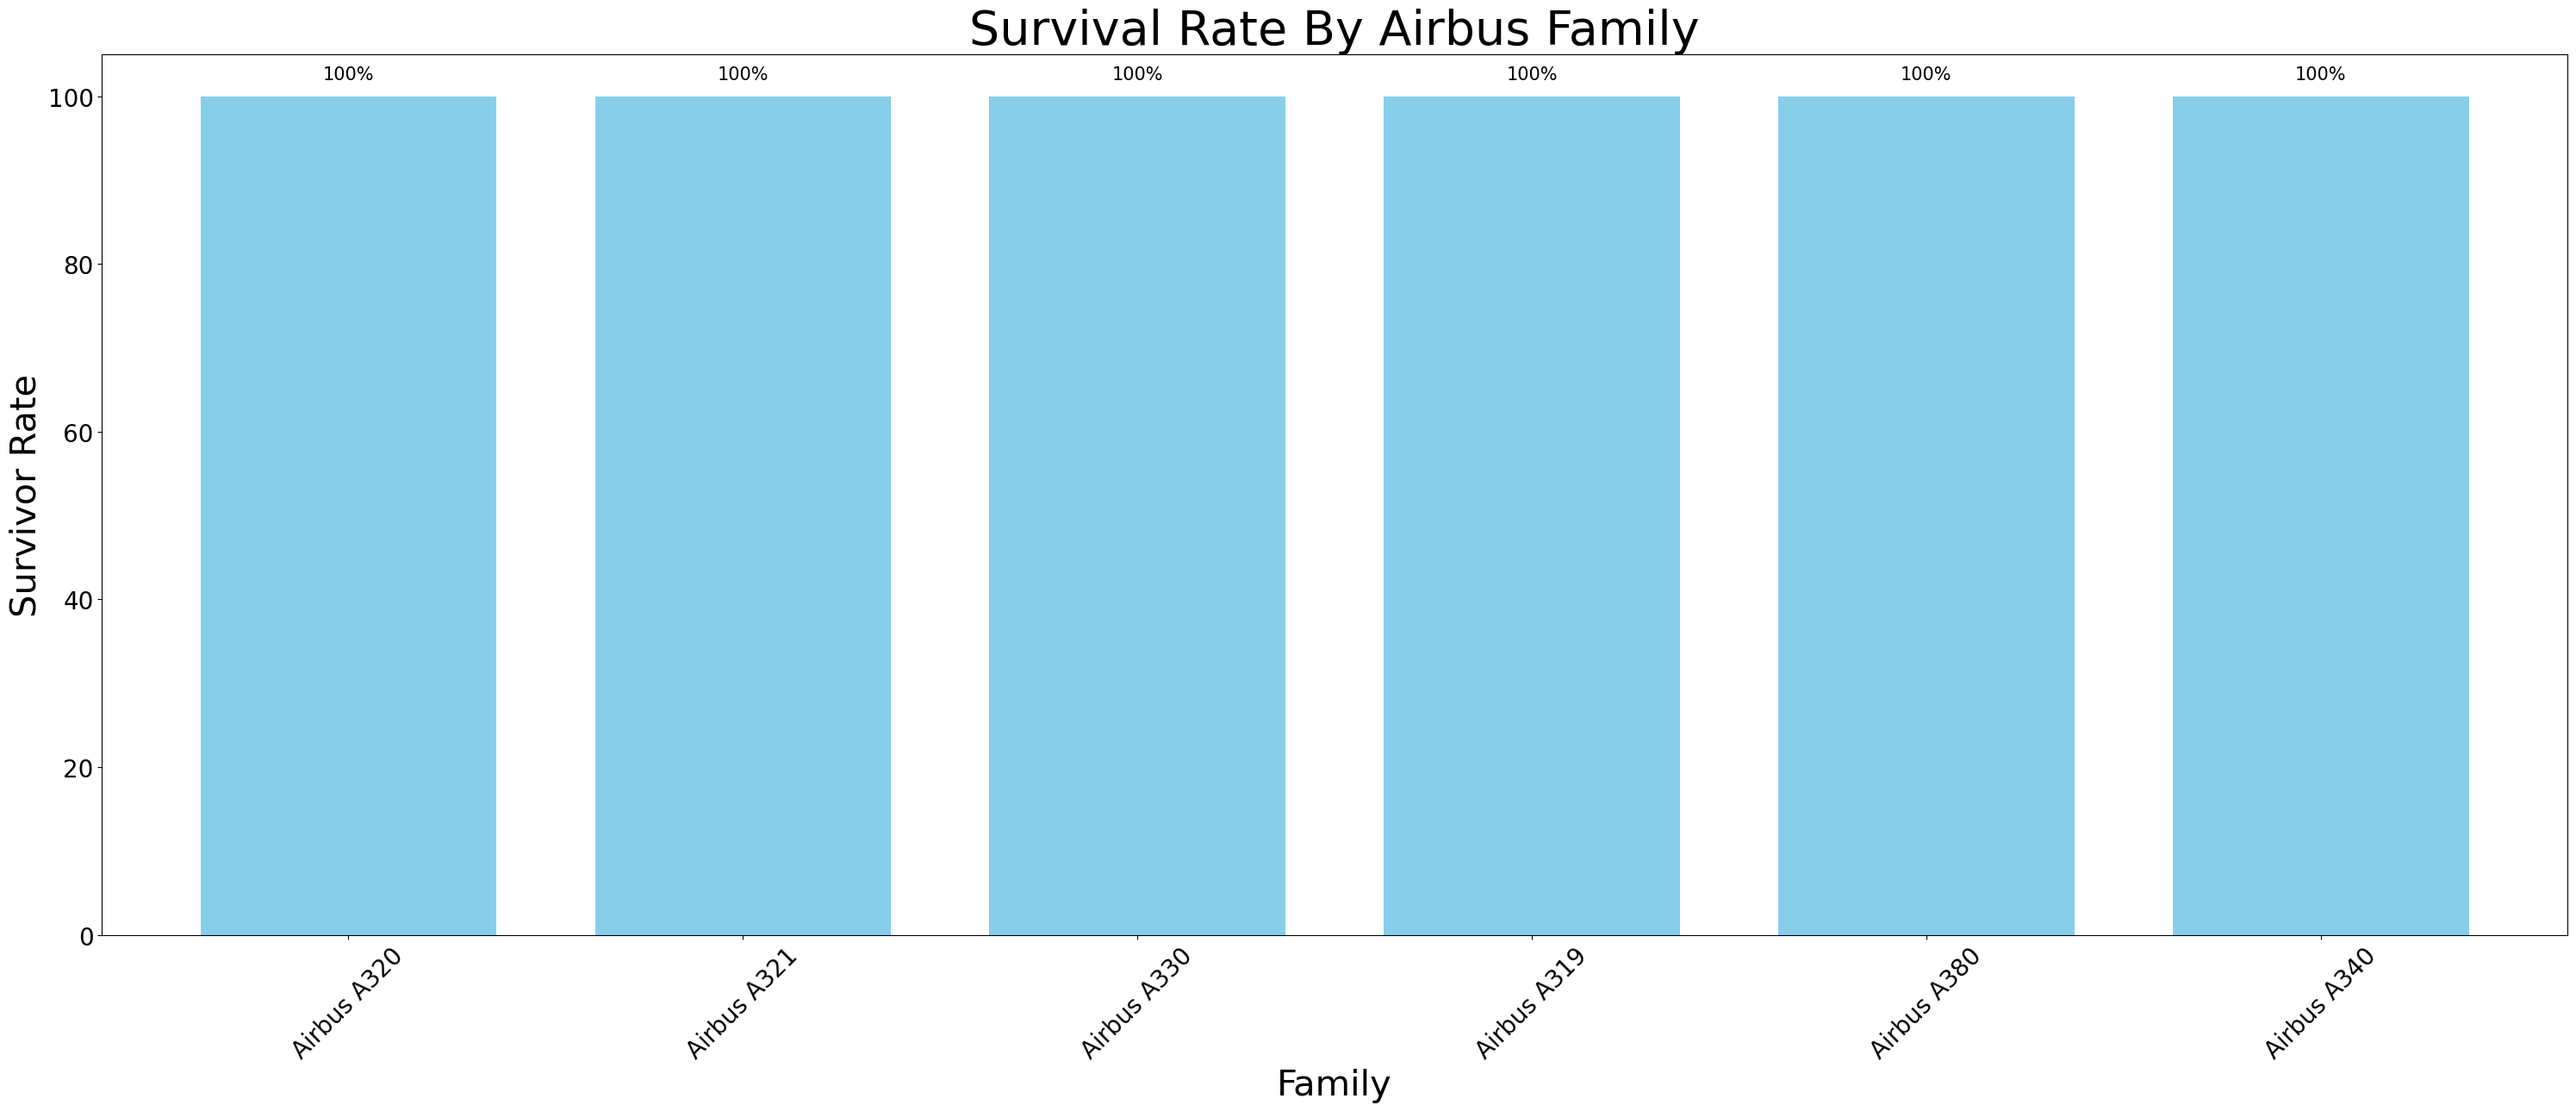

In [274]:
# Create a bar plot to visualize the Survival Rate By Airbus Family
plt.figure(figsize=(30,13))
airbus_families_df['Percent Survivors'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Family', fontsize=30)
plt.ylabel('Survivor Rate', fontsize=30)
plt.title('Survival Rate By Airbus Family', fontsize=40)
plt.xticks(rotation=45, fontsize=20) 
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
for i, v in enumerate(airbus_families_df['Percent Survivors']):
    plt.text(i, v + 2, f"{v:.0f}%", ha='center', fontsize=15, color='black')
plt.show()

## Analyzing Accidents by Month

In [275]:
df.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count,Favorable Result,Unfavorable Result
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal,Destroyed,...,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1,0,1
58138,20050208X00153,Accident,DCA05MA031,2005-02-02,"Teterboro, Nj",United States,KTEB,Teterboro NJ,Non-Fatal,Substantial,...,2,2005,Bombardier CL-600-1A11,13.0,13.0,Teterboro,NJ,1,0,0
59362,20050921X01501,Accident,DCA05MA095,2005-08-19,"Agana, Gu",United States,GUM,Guam-Antonio B. Won Pat,Non-Fatal,Substantial,...,8,2005,Boeing 747-200,340.0,340.0,Agana,GU,1,1,0
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal,Destroyed,...,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1,0,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal,Destroyed,...,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1,0,1


In [276]:
#Adding new DataFrame df_by_month
df_by_month = df.groupby(['Month']).sum(numeric_only = True)
df_by_month.sort_values(by = 'Count', ascending = False).head()
df_by_month.reset_index(inplace=True)
#Adding new DataFrame df_by_month_severity
df_by_month_severity = df.groupby(['Month', 'Injury Severity']).sum(numeric_only = True)

In [277]:
m1 = list(df_by_month_severity.iloc[0:4, :]["Count"].values/sum(df_by_month_severity.iloc[0:4, :]["Count"].values))
m2 = list(df_by_month_severity.iloc[4:8, :]["Count"].values/sum(df_by_month_severity.iloc[4:8, :]["Count"].values))
m3 = list(df_by_month_severity.iloc[8:12, :]["Count"].values/sum(df_by_month_severity.iloc[8:12, :]["Count"].values))
m4 = list(df_by_month_severity.iloc[12:16, :]["Count"].values/sum(df_by_month_severity.iloc[12:16, :]["Count"].values))
m5 = list(df_by_month_severity.iloc[16:20, :]["Count"].values/sum(df_by_month_severity.iloc[16:20, :]["Count"].values))
m6 = list(df_by_month_severity.iloc[20:24, :]["Count"].values/sum(df_by_month_severity.iloc[20:24, :]["Count"].values))
m7 = list(df_by_month_severity.iloc[24:28, :]["Count"].values/sum(df_by_month_severity.iloc[24:28, :]["Count"].values))
m8 = list(df_by_month_severity.iloc[28:32, :]["Count"].values/sum(df_by_month_severity.iloc[28:32, :]["Count"].values))
m9 = list(df_by_month_severity.iloc[32:36, :]["Count"].values/sum(df_by_month_severity.iloc[32:36, :]["Count"].values))
m10 = list(df_by_month_severity.iloc[36:40, :]["Count"].values/sum(df_by_month_severity.iloc[36:40, :]["Count"].values))
m11 = list(df_by_month_severity.iloc[40:44, :]["Count"].values/sum(df_by_month_severity.iloc[40:44, :]["Count"].values))
m12 = list(df_by_month_severity.iloc[44:48, :]["Count"].values/sum(df_by_month_severity.iloc[44:48, :]["Count"].values))

len(m1 +m2 + m3 +m4 +m5 + m6 + m7 + m8 +m9 + m10 + m11 +m12)

24

In [278]:
percent =m1 +m2 + m3 +m4 +m5 + m6 + m7 + m8 +m9 + m10 + m11 +m12
df_by_month_severity.shape

(24, 11)

In [279]:
df_by_month_severity['percent'] = percent
df_by_month_severity

Number Of Engines  Total Fatal Injuries  \
Month Injury Severity                                            
1     Fatal                        203.0                 284.0   
      Non-Fatal                    787.0                   0.0   
2     Fatal                        214.0                 386.0   
      Non-Fatal                    901.0                   0.0   
3     Fatal                        223.0                 343.0   
      Non-Fatal                   1203.0                   0.0   
4     Fatal                        249.0                 353.0   
      Non-Fatal                   1238.0                   0.0   
5     Fatal                        298.0                 437.0   
      Non-Fatal                   1523.0                   0.0   
6     Fatal                        338.0                 539.0   
      Non-Fatal                   1795.0                   0.0   
7     Fatal                        371.0                 620.0   
      Non-Fatal                   1903.0                   0.0   
8     Fatal                        366.0                 580.0   
      Non-Fatal                   1755.0                   0.0   
9     Fatal                        297.0                 470.0   
      Non-Fatal                   1544.0                   0.0   
10    Fatal                        306.0                 441.0   
      Non-Fatal                   1187.0                   0.0   
11    Fatal                        285.0                 431.0   
      Non-Fatal                    874.0                   0.0   
12    Fatal                        224.0                 338.0   
      Non-Fatal                    755.0                   0.0   

                       Total Serious Injuries  Total Minor Injuries  \
Month Injury Severity                                                 
1     Fatal                               5.0                  23.0   
      Non-Fatal                         194.0                 111.0   
2     Fatal                              11.0                  22.0   
      Non-Fatal                         264.0                 150.0   
3     Fatal                               1.0                  25.0   
      Non-Fatal                         286.0                 181.0   
4     Fatal                             132.0                  35.0   
      Non-Fatal                         327.0                 181.0   
5     Fatal                              16.0                  58.0   
      Non-Fatal                         455.0                 212.0   
6     Fatal                              14.0                  64.0   
      Non-Fatal                         507.0                 280.0   
7     Fatal                             163.0                 108.0   
      Non-Fatal                         555.0                 330.0   
8     Fatal                              16.0                  56.0   
      Non-Fatal                         575.0                 312.0   
9     Fatal                              10.0                  43.0   
      Non-Fatal                         462.0                 277.0   
10    Fatal                              16.0                  55.0   
      Non-Fatal                         333.0                 208.0   
11    Fatal                               8.0                  34.0   
      Non-Fatal                         281.0                 140.0   
12    Fatal                               7.0                  23.0   
      Non-Fatal                         242.0                 141.0   

                       Total Uninjured     Year  Total Passengers  \
Month Injury Severity                                               
1     Fatal                       11.0   352473             323.0   
      Non-Fatal                 3169.0  1428409            3474.0   
2     Fatal                        5.0   366650             424.0   
      Non-Fatal                 4965.0  1567327            5379.0   
3     Fatal                        6.0   4108

In [280]:
#Adding new DataFrame df_fatal_by_month
df_by_month_severity.reset_index(inplace=True)
df_fatal_by_month = df_by_month_severity[df_by_month_severity['Injury Severity'] == 'Fatal']
df_fatal_by_month

,Month,Injury Severity,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,percent
0,1,Fatal,203.0,284.0,5.0,23.0,11.0,352473,323.0,39.0,175,0,69,0.094902
2,2,Fatal,214.0,386.0,11.0,22.0,5.0,366650,424.0,38.0,182,0,78,0.098698
4,3,Fatal,223.0,343.0,1.0,25.0,6.0,410886,375.0,32.0,204,0,73,0.076778
6,4,Fatal,249.0,353.0,132.0,35.0,17.0,451154,537.0,184.0,224,0,97,0.084306
8,5,Fatal,298.0,437.0,16.0,58.0,1.0,552044,512.0,75.0,274,0,110,0.073458
10,6,Fatal,338.0,539.0,14.0,64.0,18.0,632506,635.0,96.0,314,0,123,0.084182
12,7,Fatal,371.0,620.0,163.0,108.0,123.0,717143,1014.0,394.0,356,0,139,0.084420
14,8,Fatal,366.0,580.0,16.0,56.0,26.0,690845,678.0,98.0,343,0,127,0.081337
16,9,Fatal,297.0,470.0,10.0,43.0,5.0,574213,528.0,58.0,285,0,116,0.090880
18,10,Fatal,306.0,441.0,16.0,55.0,58.0,566166,570.0,129.0,281,0,118,0.089605


In [281]:
df_fatal_by_month['percent'] = df_fatal_by_month['percent']*100

In [282]:
df_fatal_by_month

,Month,Injury Severity,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,percent
0,1,Fatal,203.0,284.0,5.0,23.0,11.0,352473,323.0,39.0,175,0,69,9.490239
2,2,Fatal,214.0,386.0,11.0,22.0,5.0,366650,424.0,38.0,182,0,78,9.869848
4,3,Fatal,223.0,343.0,1.0,25.0,6.0,410886,375.0,32.0,204,0,73,7.677832
6,4,Fatal,249.0,353.0,132.0,35.0,17.0,451154,537.0,184.0,224,0,97,8.430561
8,5,Fatal,298.0,437.0,16.0,58.0,1.0,552044,512.0,75.0,274,0,110,7.345845
10,6,Fatal,338.0,539.0,14.0,64.0,18.0,632506,635.0,96.0,314,0,123,8.418231
12,7,Fatal,371.0,620.0,163.0,108.0,123.0,717143,1014.0,394.0,356,0,139,8.442020
14,8,Fatal,366.0,580.0,16.0,56.0,26.0,690845,678.0,98.0,343,0,127,8.133744
16,9,Fatal,297.0,470.0,10.0,43.0,5.0,574213,528.0,58.0,285,0,116,9.088010
18,10,Fatal,306.0,441.0,16.0,55.0,58.0,566166,570.0,129.0,281,0,118,8.960459


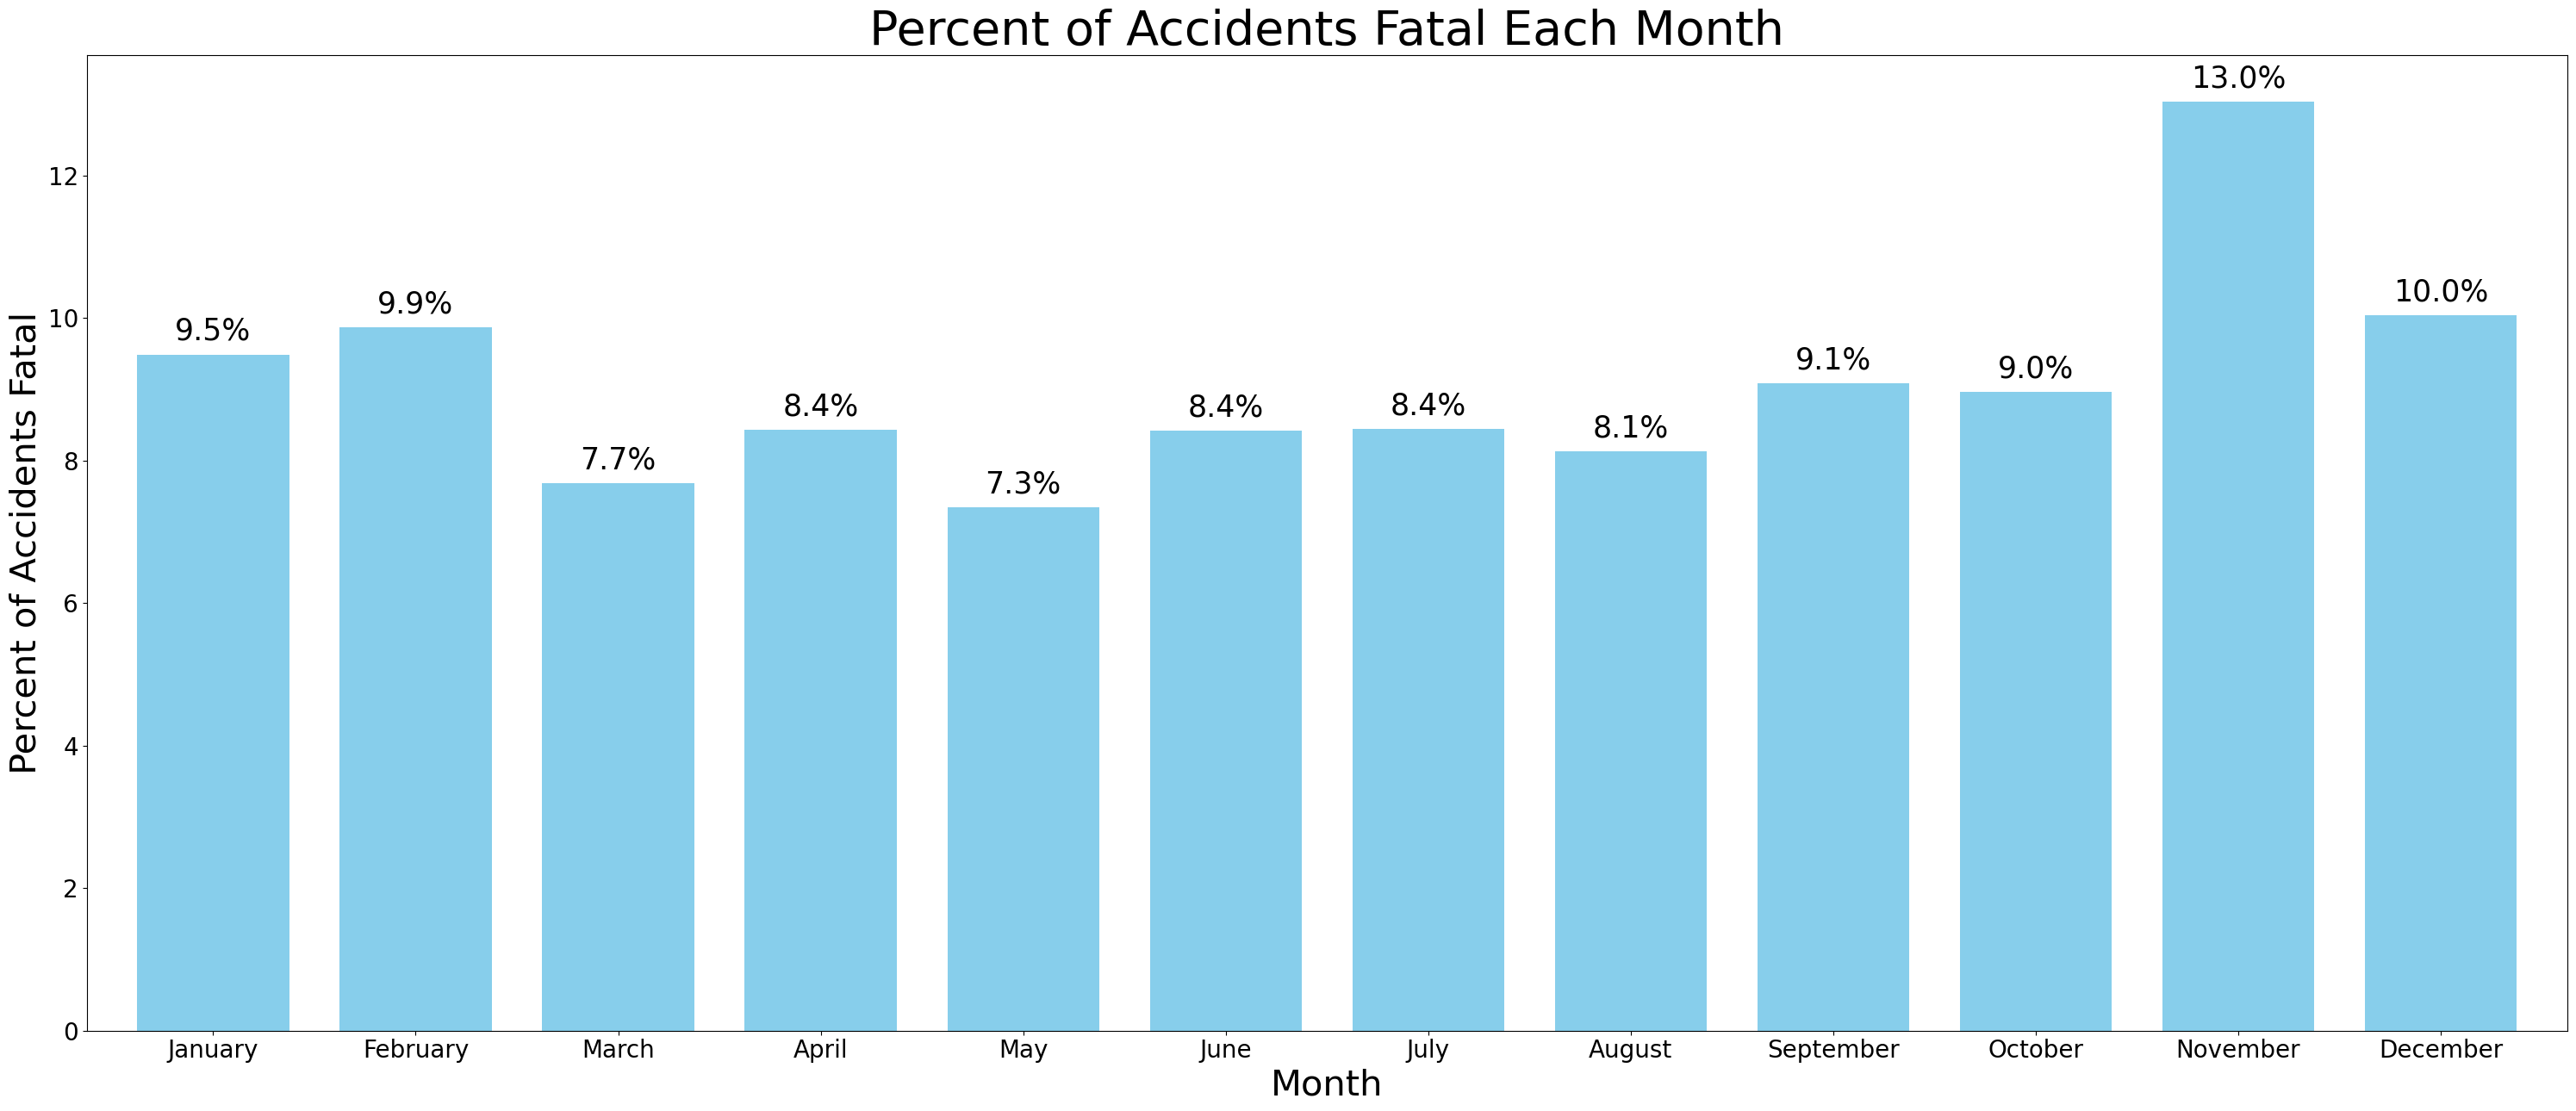

In [283]:
# Create a bar plot to visualize Percent of Accidents Fatal Each Month
import calendar

plt.figure(figsize=(30,13))
df_fatal_by_month['percent'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Percent of Accidents Fatal', fontsize=30)

month_positions = range(0, 12)  # Assuming 1 to 12 for months
month_labels = [calendar.month_name[i] for i in df_fatal_by_month['Month']]
plt.title('Percent of Accidents Fatal Each Month', fontsize=40)
plt.xticks(month_positions, month_labels, rotation=0, fontsize=20) 
plt.yticks(rotation=0, fontsize=20)
plt.tight_layout()
for i, v in enumerate(df_fatal_by_month['percent']):
    plt.text(i, v + .2, f"{v:.1f}%", ha='center', fontsize=25, color='black')

plt.show()

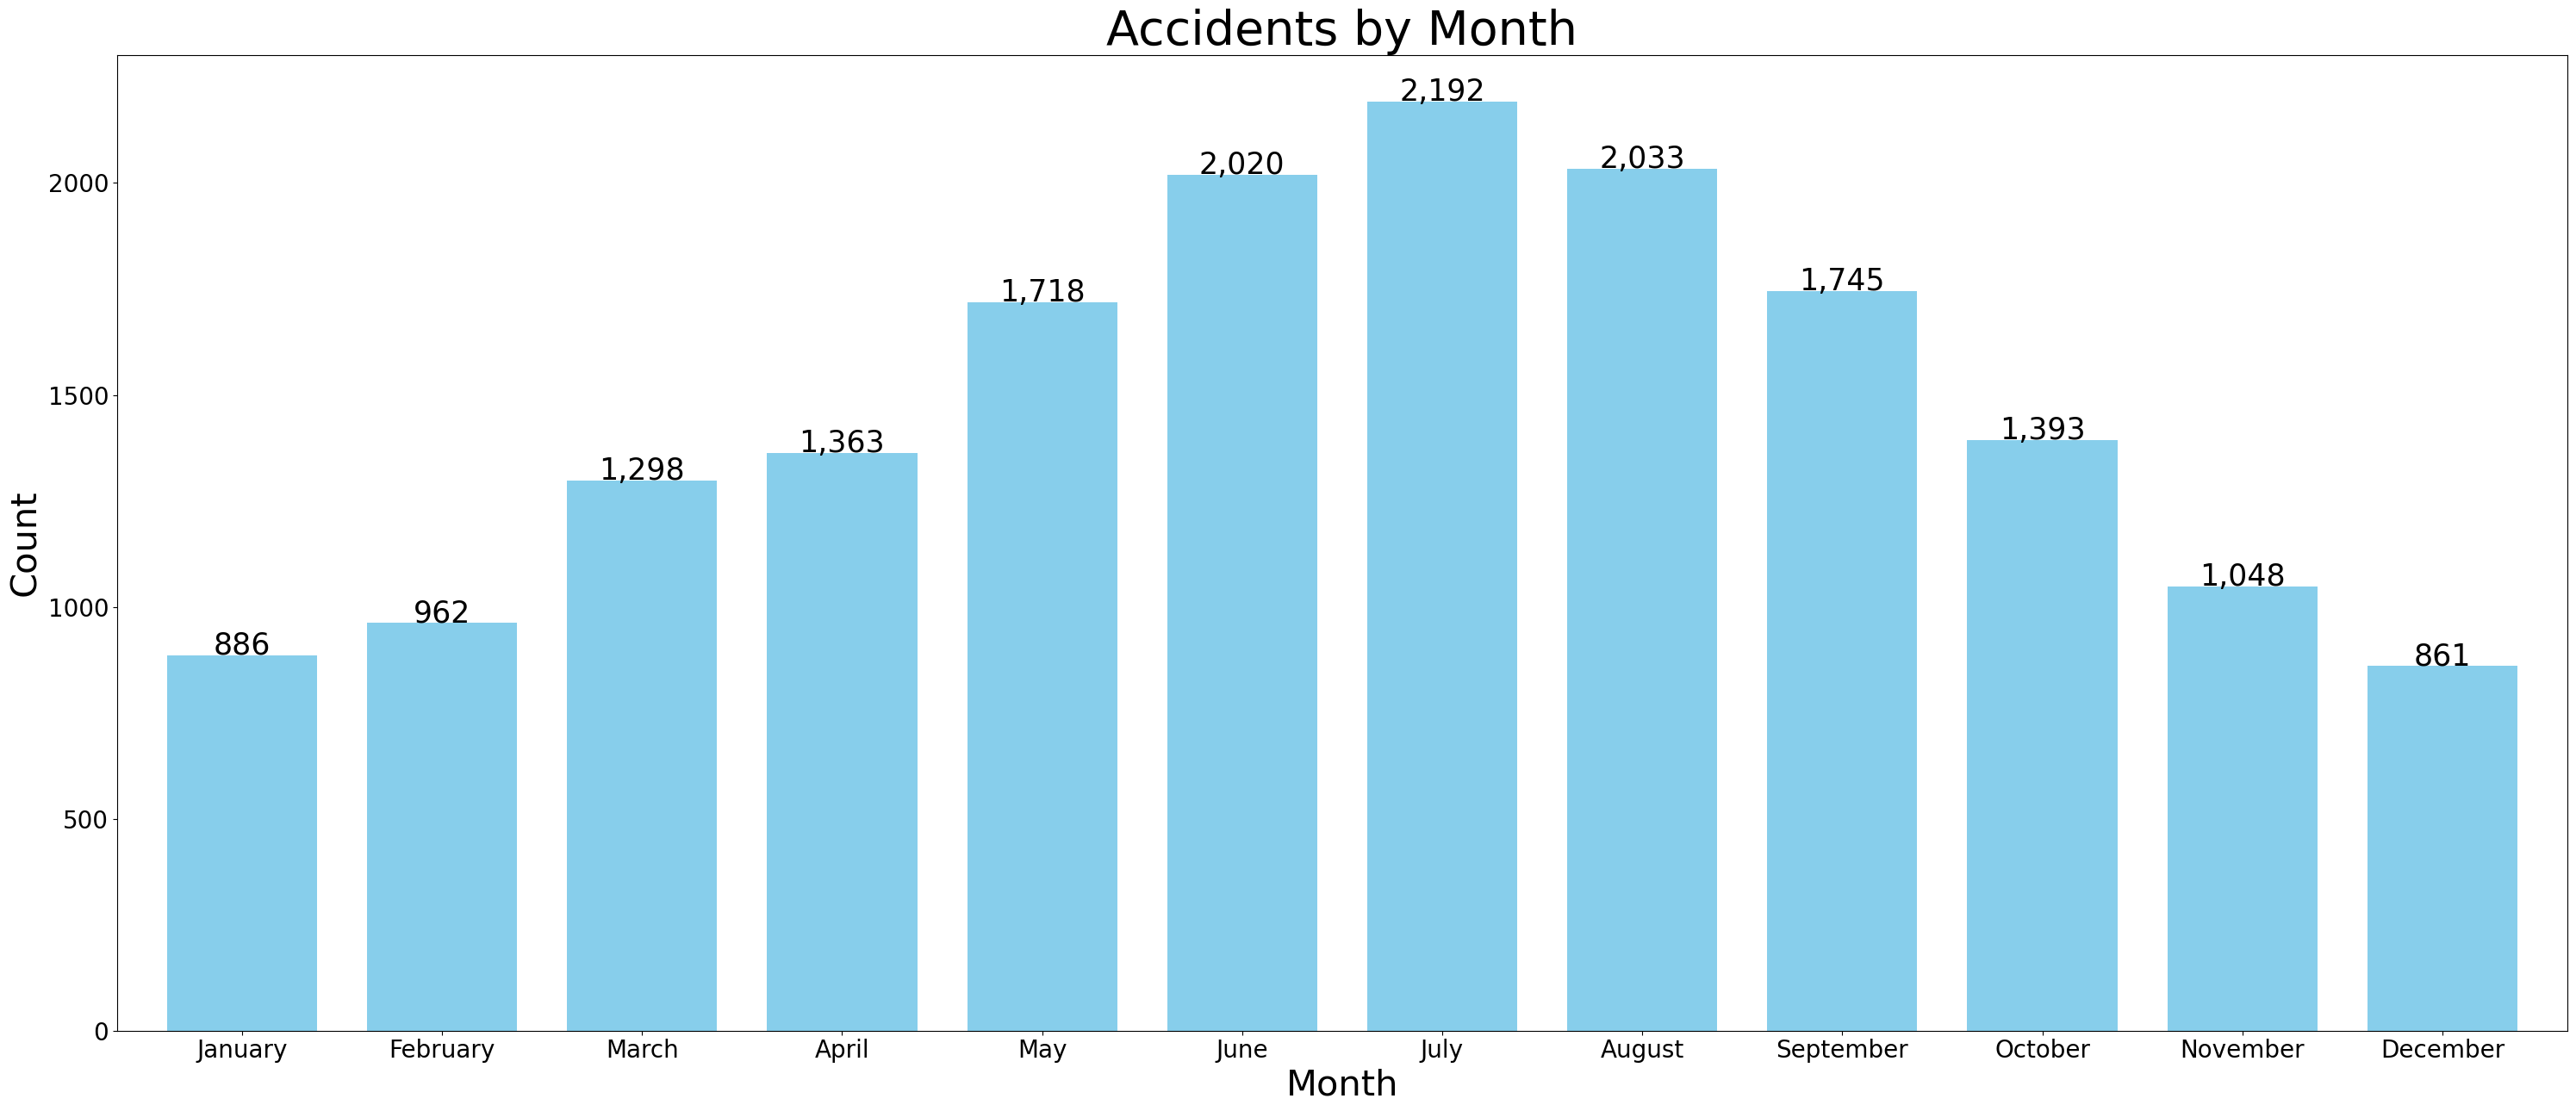

In [284]:
# Create a bar plot to visualize Accidents by Month
import calendar

plt.figure(figsize=(30, 13))
ax = df_by_month['Count'].plot(kind='bar', color='skyblue', width=0.75)
plt.xlabel('Month', fontsize=30)
plt.ylabel('Count', fontsize=30)
month_names = [calendar.month_name[i] for i in df_by_month['Month']]
plt.yticks(rotation=0, fontsize=20)
ax.set_xticklabels(month_names, rotation=0, fontsize=20)
plt.title('Accidents by Month', fontsize=40)
plt.tight_layout()
for i, v in enumerate(df_by_month['Count']):
    plt.text(i, v + 1.5, f"{v:,.0f}", ha='center', fontsize=25, color='black')
plt.show()

In [285]:
df_by_month['Percent Fatal Injuries'] = (df_by_month['Total Fatal Injuries'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Serious Injuries'] = (df_by_month['Total Serious Injuries'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Minor Injuries'] = (df_by_month['Total Minor Injuries'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Uninjured'] = (df_by_month['Total Uninjured'] / df_by_month['Total Passengers'])*100
df_by_month['Percent Survivors'] = (df_by_month['Total Survivors'] / df_by_month['Total Passengers'])*100
df_by_month.sort_values(by='Month', inplace=True)
df_by_month


,Month,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year,Total Passengers,Total Survivors,Count,Favorable Result,Unfavorable Result,Percent Fatal Injuries,Percent Serious Injuries,Percent Minor Injuries,Percent Uninjured,Percent Survivors
0,1,993.0,284.0,199.0,134.0,3180.0,1784918,3797.0,3513.0,886,17,69,7.479589,5.240980,3.529102,83.750329,92.520411
1,2,1120.0,386.0,275.0,172.0,4970.0,1938014,5803.0,5417.0,962,33,78,6.651732,4.738928,2.963984,85.645356,93.348268
2,3,1429.0,343.0,287.0,206.0,4339.0,2614825,5175.0,4832.0,1298,22,73,6.628019,5.545894,3.980676,83.845411,93.371981
3,4,1490.0,353.0,459.0,216.0,4855.0,2745338,5883.0,5530.0,1363,24,97,6.000340,7.802142,3.671596,82.525922,93.999660
4,5,1821.0,437.0,471.0,270.0,6740.0,3461007,7918.0,7481.0,1718,35,110,5.519070,5.948472,3.409952,85.122506,94.480930
5,6,2146.0,539.0,521.0,344.0,5649.0,4069477,7053.0,6514.0,2020,28,123,7.642138,7.386928,4.877357,80.093577,92.357862
6,7,2279.0,620.0,718.0,438.0,5608.0,4416192,7384.0,6764.0,2192,25,139,8.396533,9.723727,5.931744,75.947996,91.603467
7,8,2126.0,580.0,591.0,368.0,6453.0,4095002,7992.0,7412.0,2033,34,127,7.257257,7.394895,4.604605,80.743243,92.742743
8,9,1843.0,470.0,472.0,320.0,5102.0,3515725,6364.0,5894.0,1745,26,116,7.385292,7.416719,5.028284,80.169705,92.614708
9,10,1495.0,441.0,349.0,263.0,4876.0,2806683,5929.0,5488.0,1393,31,118,7.438017,5.886321,4.435824,82.239838,92.561983


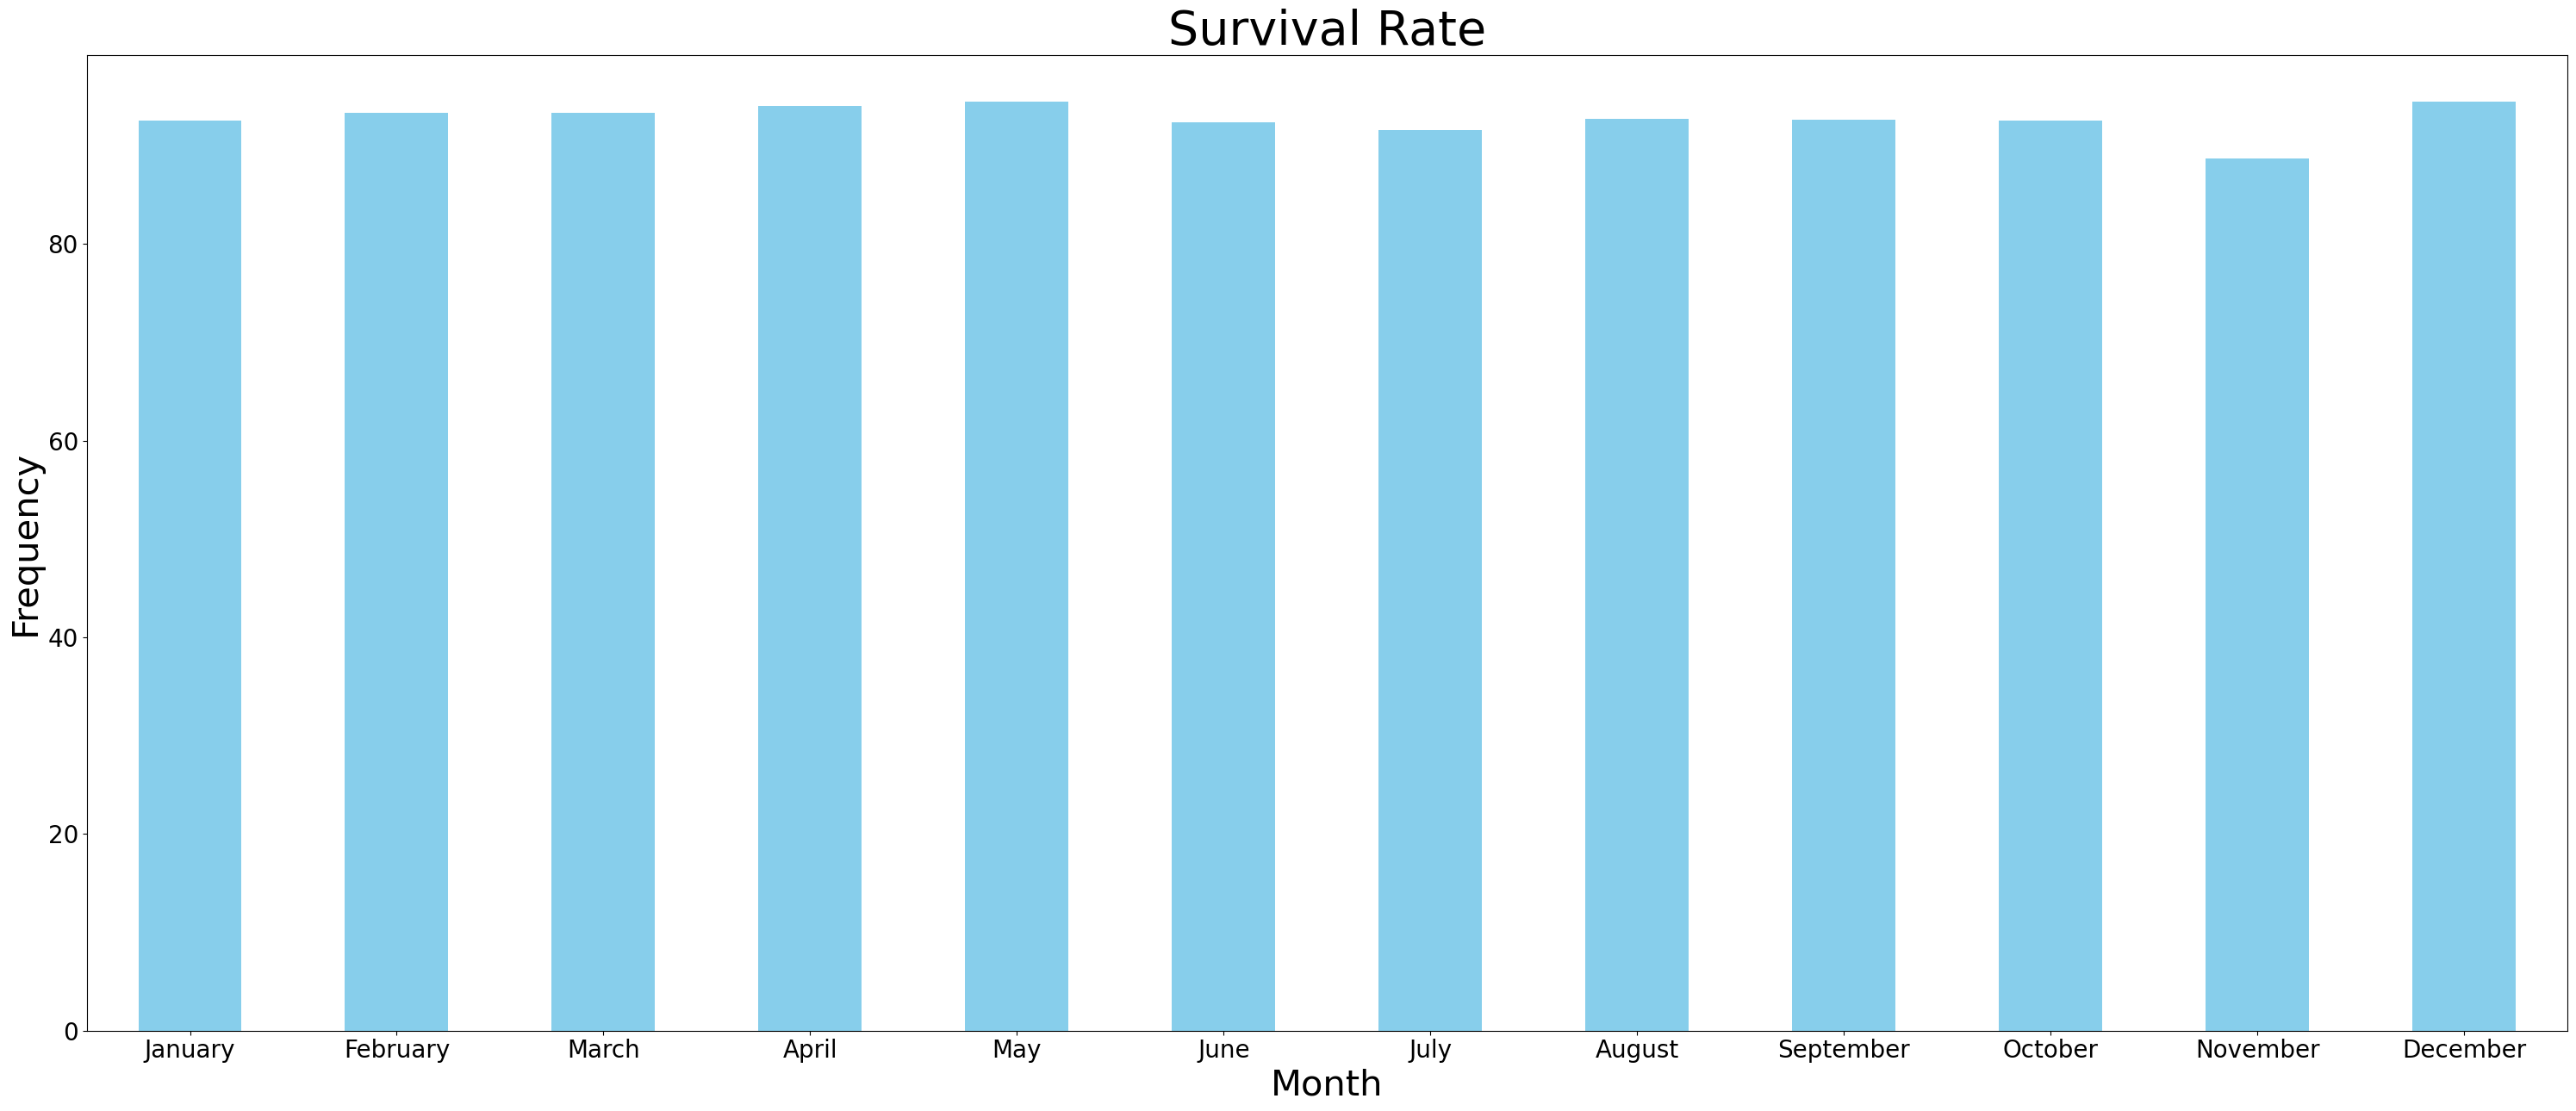

In [286]:
# Create a bar plot to visualize the Survival Rate
plt.figure(figsize=(30, 13))
ax = df_by_month['Percent Survivors'].plot(kind='bar', color='skyblue')
plt.xlabel('Month', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
month_names = [calendar.month_name[i] for i in df_by_month['Month']]
plt.yticks(rotation=0, fontsize=20)
ax.set_xticklabels(month_names, rotation=0, fontsize=20)
plt.title('Survival Rate', fontsize=40)
plt.tight_layout()
plt.show()

In [287]:
#Adding new DataFrame bed_conditions_df
bad_conditions_df = df[(df['Aircraft Damage'] == 'Destroyed') & (df['Injury Severity'] == 'Fatal')]
bad_conditions_df

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Airport Code,Airport Name,Injury Severity,Aircraft Damage,...,Month,Year,Make & Model,Total Passengers,Total Survivors,City,State,Count,Favorable Result,Unfavorable Result
54904,20030626X00959,Accident,FTW03FA174,2003-06-21,"Cushing, Ok",United States,NaN,NaN,Fatal,Destroyed,...,6,2003,Cessna 182H,6.0,5.0,Cushing,OK,1,0,1
61649,20061115X01677,Accident,LAX07FA026,2006-11-04,"Yuba City, Ca",United States,NaN,NaN,Fatal,Destroyed,...,11,2006,Aircraft Mfg & Dev. Co. (Amd) CH601XL SLSA,2.0,0.0,Yuba City,CA,1,0,1
61787,20061220X01818,Accident,NYC07FA041,2006-12-07,"Summersville, Wv",United States,NaN,NaN,Fatal,Destroyed,...,12,2006,Mooney M20R,1.0,0.0,Summersville,WV,1,0,1
62114,20070510X00546,Accident,DFW07LA160,2007-02-28,"Carlsbad, Nm",United States,NaN,NaN,Fatal,Destroyed,...,2,2007,Ingraham RV-6,1.0,0.0,Carlsbad,NM,1,0,1
62139,20070316X00301,Accident,LAX07FA103,2007-03-07,"Tooele, Ut",United States,NaN,NaN,Fatal,Destroyed,...,3,2007,Piper PA-28-235,3.0,0.0,Tooele,UT,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,20221118106319,Accident,CEN23FA038,2022-11-18,"Decatur, Tx",United States,NaN,NaN,Fatal,Destroyed,...,11,2022,Cessna 421C,1.0,0.0,Decatur,TX,1,0,1
88812,20221123106352,Accident,WPR23FA044,2022-11-22,"Banning, Ca",United States,BNG,NaN,Fatal,Destroyed,...,11,2022,Gallagher XLT-RG,1.0,0.0,Banning,CA,1,0,1
88843,20221205106408,Accident,CEN23FA057,2022-12-04,"Cleburne, Tx",United States,CPT,CLEBURNE RGNL,Fatal,Destroyed,...,12,2022,Cessna 210-5(205),2.0,0.0,Cleburne,TX,1,0,1
88845,20221205106417,Accident,CEN23FA059,2022-12-05,"Corning, Ia",United States,CRZ,Corning Municipal Airport,Fatal,Destroyed,...,12,2022,Engineering & Research ERCOUPE 415-C,1.0,0.0,Corning,IA,1,0,1


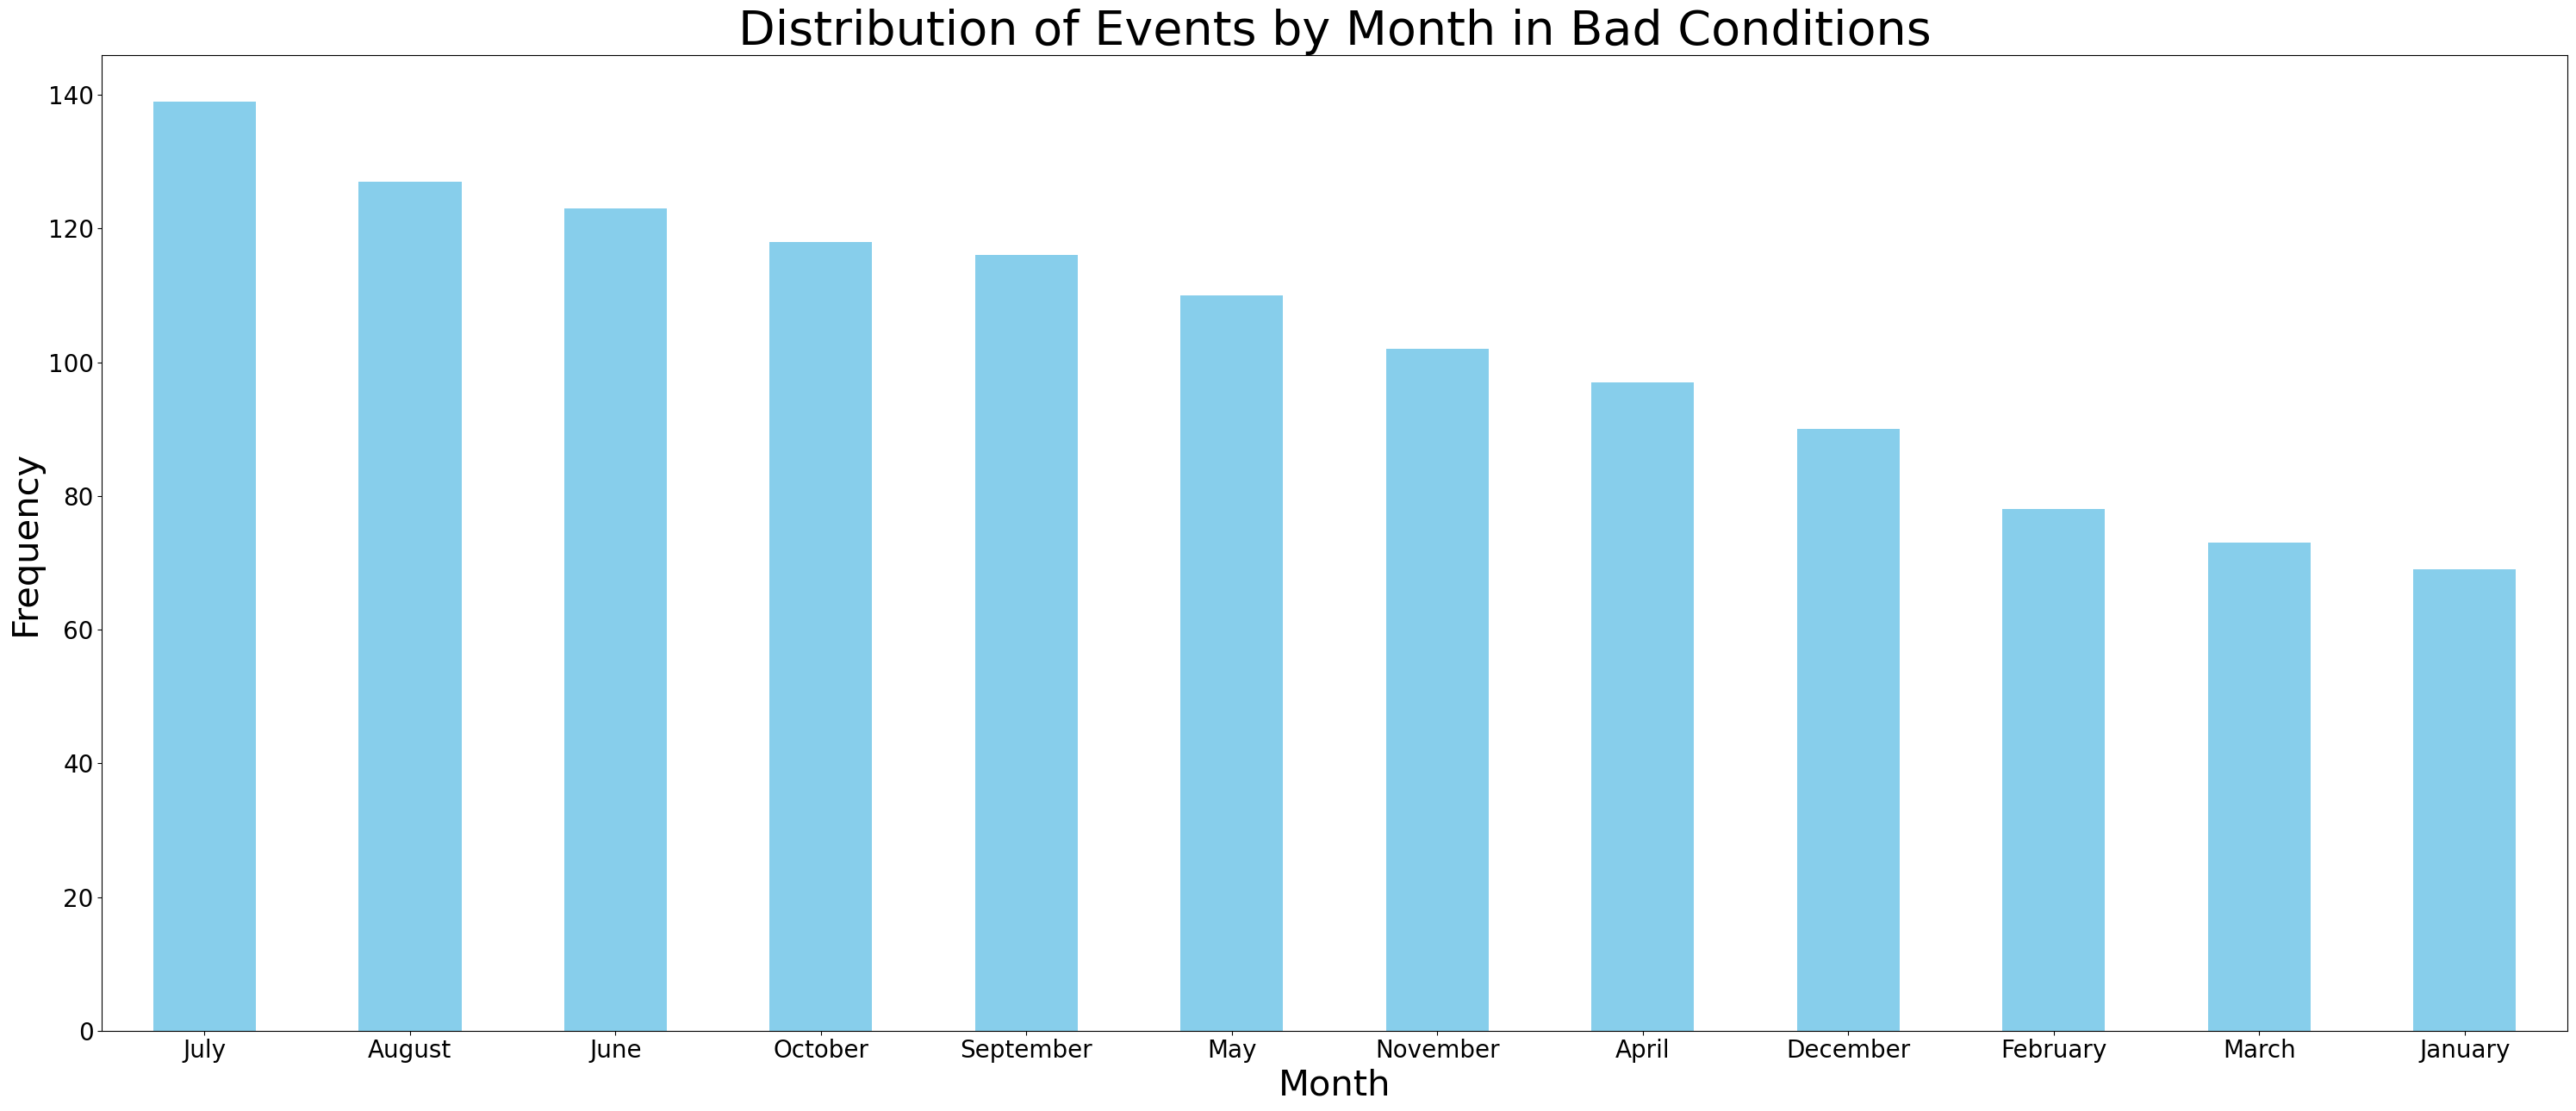

In [288]:
# Create a bar plot to visualize the Distribution of Events by Month in Bad Conditions
bad_counts = bad_conditions_df['Month'].value_counts()
plt.figure(figsize=(30, 13))
ax = bad_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
month_names = [calendar.month_name[i] for i in bad_counts.index]
plt.yticks(rotation=0, fontsize=20)
ax.set_xticklabels(month_names, rotation=0, fontsize=20)
plt.title('Distribution of Events by Month in Bad Conditions', fontsize=40)
plt.tight_layout()
plt.show()

### Writing DF's to CVS (for use in Tableau)

In [289]:
csv_filename = 'Data/aviation_cleaned.csv' 
df.to_csv(csv_filename, index=True)
csv_filename_2 = 'Data/by state data.csv'
df_by_state.to_csv(csv_filename_2, index=True)
csv_filename_3 = 'Data/by make data.csv'
df_make.to_csv(csv_filename_3, index=True)

In [290]:
csv_filename_4 = 'Data/airbus_families.csv'
airbus_families_df.to_csv(csv_filename_4, index=True)
csv_filename_4 = 'Data/boeing_families.csv'
boeing_families_df.to_csv(csv_filename_4, index=True)